In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import RectBivariateSpline
from scipy import stats
import cv2
import pywt

# Load a sample image
img = cv2.imread("images/baboon.png")

# Convert BGR image to RGB (since OpenCV loads images in BGR format)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Understanding Digital Image Processing

## Mathematical Tools for Image Processing
### 3.1	Introduction
In various image processing activities, mathematical operations are very important. An image itself is represented in the form of a numerical matrix, having intensity or color information at each cell. In image processing operations, a large number of mathematical operations are used

### 3.2 Distance Function
In image processing, we often need to measure the "distance" between pixels. This isn't just the physical space between them, but often reflects differences in color, brightness, or other properties. This is useful for shape analysis, object detection, and image segmentation.

To be a valid way to measure distance, a function must meet certain conditions. Here's a simple breakdown:

1. **Distance Function**: This is just a fancy way of saying we have a rule to calculate the distance between two things. - In this case, the two things are pixels.
- This just says that the distance function, $D$, takes two pixels from a set $S$ (like an image) and gives a non-negative real number as the distance.

$$D : S \times S \rightarrow [0,\infty)$$

2. **Conditions for a Valid Distance Measure**:

- Non-negative or separation axiom: The distance between any two pixels must always be non-negative. Also, the distance between a pixel and itself is always zero.

$$ D(x, y) \geq 0$$
$$and$$
$$D(x, y) = 0 \text{ if } x = y$$

   
- Symmetry: The distance from pixel x to pixel y is the same as the distance from pixel y to pixel x. This just means that order doesn't matter.
       
$$D(x, y) = D(y, x)$$

- Triangle inequality or subadditivity:The distance between two pixels x and z shouldn't be more than the sum of the distances from x to another pixel y and from y to z. This is a bit like saying that the shortest path between two points is a straight line.
   
$$D(x, z) \leq D(x, y) + D(y, z)$$

There are different types of distance functions, such as:
1. Euclidean Distance: Calculates the straight-line distance between two points.
2. Manhattan Distance (or L1 norm): Calculates the distance traveled along the axes at right angles. also known as ‘taxi-cab’ distance or ‘city block’ distance,
3. Chessboard Distance (or L∞ norm): Calculates the maximum of the absolute differences of the coordinates.

##### Euclidean distance
Euclidean distance is one of the most commonly used distance measures, especially in two-dimensional spaces. It's the "straight-line" distance between two points in a plane. The concept derives from the Pythagorean theorem.

For two points $(x_1,y_1)$ and $(x_2,y_2)$ in a plane, the Euclidean distance $D$ between them is given by:

$$ D((x_1,y_1), (x_2, y2)) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

This formula computes the length of the hypotenuse of a right triangle using the differences between the x-coordinates and the y-coordinates of the two points as the other two sides. The square root ensures we get a positive distance value.

Here’s a Python example to calculate Euclidean distance:

Euclidean Distance: 5.0


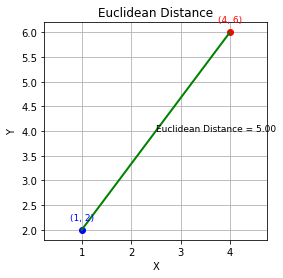

In [2]:
def euclidean_distance(p, q):
    """Calculate Euclidean distance between two points."""
    return np.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)

# Define two points P and Q
P = (1, 2)
Q = (4, 6)

# Calculate Euclidean distance
edistance = euclidean_distance(P, Q)
print('Euclidean Distance:', edistance)

# Visualize the points and the Euclidean distance
plt.figure(figsize=(4, 4))
plt.plot(*P, 'bo')
plt.plot(*Q, 'ro')

# Draw line to represent Euclidean distance
plt.plot([P[0], Q[0]], [P[1], Q[1]], 'g-', linewidth=2, label='Euclidean Distance')

# Add annotations
plt.annotate(f'({P[0]}, {P[1]})', P, textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
plt.annotate(f'({Q[0]}, {Q[1]})', Q, textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
plt.annotate(f'Euclidean Distance = {edistance:.2f}', ((P[0] + Q[0]) / 2, (P[1] + Q[1]) / 2), fontsize=9, ha='left')

# Set up plot
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Euclidean Distance')
plt.axis('equal')
plt.show()

##### Manhattan distance
Manhattan distance, often referred to as the "city block" or "taxi-cab" distance, is a metric rooted in the grid-like structure of streets you might find in cities like Manhattan. Imagine trying to navigate this city grid to get from one point to another. Unlike birds, we can't just fly in a straight line (like the Euclidean distance would suggest). Instead, we're bound by the grid and have to move along the streets, either horizontally or vertically.

The name "taxi-cab" distance originates from this very idea. If you were to take a taxi in such a city, the taxi would have to drive along these streets, even if it means going around blocks to reach the destination. The total distance the taxi drives is the Manhattan distance between the start and end points. 

For two points $(x_1,y_1)$ and $(x_2,y_2)$ on a grid, the Manhattan distance $D_4$ between them is given by:

$$ D_4((x_1, y_1), (x_2, y_2)) = |x_1 - x_2| + |y_1 - y_2| $$

Here:
- $|x_1 - x_2|$ represents the absolute difference between the x-coordinates of the two points.
- $|y_1 - y_2|$represents the absolute difference between the y-coordinates of the two points.

This formula calculates the sum of the horizontal and vertical distances between two points on a grid. Since you're only allowed to move along the grid lines (no diagonal movement), this metric effectively counts the number of "blocks" you'd have to traverse to get from one point to the other.

Here’s a Python example to calculate Manhattan distance:

Manhattan Distance: 7


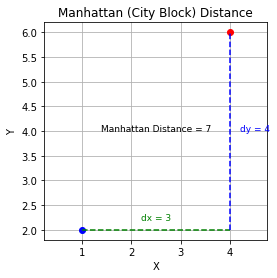

In [3]:
def manhattan_distance(p, q):
    """Calculate Manhattan (City Block) distance between two points."""
    return abs(p[0] - q[0]) + abs(p[1] - q[1])


# Calculate Manhattan distance
mdistance = manhattan_distance(P, Q)
print('Manhattan Distance:', mdistance)

# Visualize the points and the Manhattan distance
plt.figure(figsize=(4, 4))
plt.plot(*P, 'bo')
plt.plot(*Q, 'ro')

# Draw lines to represent Manhattan distance
plt.plot([P[0], Q[0]], [P[1], P[1]], 'g--')
plt.plot([Q[0], Q[0]], [P[1], Q[1]], 'b--')

# Add annotations
plt.annotate(f'dx = {abs(Q[0] - P[0])}', ((P[0] + Q[0]) / 2, P[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
plt.annotate(f'dy = {abs(Q[1] - P[1])}', (Q[0], (P[1] + Q[1]) / 2), textcoords="offset points", xytext=(10,0), ha='left', fontsize=9, color='blue')
plt.annotate(f'Manhattan Distance = {mdistance}', ((P[0] + Q[0]) / 2, (P[1] + Q[1]) / 2), fontsize=9, ha='center')

# Set up plot
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Manhattan (City Block) Distance')
plt.axis('equal')
plt.show()

##### Chessboard (Chebyshev) Distance
The Chessboard or Chebyshev distance is inspired by the movement of a king on a chessboard. On a chessboard, a king can move horizontally, vertically, or diagonally. The maximum distance it moves in any direction is one square, regardless of the direction.

Now, when we are measuring distances between two points, if they are horizontally or vertically aligned, the Manhattan distance and the Chebyshev distance will give the same result. However, when the two points are diagonally aligned, the Chebyshev distance considers the diagonal as a single step, while the Manhattan distance counts both the vertical and horizontal components.

This is why the Chebyshev distance between two points is simply the maximum difference in either the x-coordinates or the y-coordinates. By picking the maximum of the two, we're essentially picking the longer leg of the right triangle formed by the two points and the diagonal.

For two points $(x_1,y_1)$ and $(x_2,y_2)$ on a grid, the Chebyshev (or Chessboard) distance $D_8$ between them is given by:

$$ D_8((x_1, y_1), (x_2, y_2)) = \max(|x_1 - x_2|, |y_1 - y2|) $$

Here:
- $\max(|x_1 - x_2|, |y_1 - y2|)$ returns the larger value between the absolute difference of the x-coordinates and the y-coordinates of the two points.

In simpler terms, it asks: "Which is greater: the horizontal distance or the vertical distance?" and returns that as the Chessboard distance. This metric is particularly useful in grid-based pathfinding where diagonal movement is allowed.

Here’s a Python example to calculate Chessboard or Chebyshev distance:

Chebyshev Distance: 4


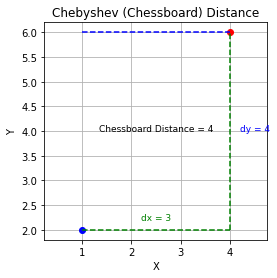

In [4]:
def chessboard_distance(p, q):
    """Calculate Chessboard (Chebyshev) distance between two points."""
    return max(abs(p[0] - q[0]), abs(p[1] - q[1]))

# Calculate Chessboard distance
cdistance = chessboard_distance(P, Q)
print('Chebyshev Distance:', cdistance)

# Visualize the points and the Chessboard distance
plt.figure(figsize=(4, 4))
plt.plot(*P, 'bo')
plt.plot(*Q, 'ro')

# Draw lines to represent Chessboard distance
plt.plot([P[0], Q[0]], [P[1], P[1]], 'g--')
plt.plot([Q[0], Q[0]], [P[1], Q[1]], 'g--')
plt.plot([P[0], Q[0]], [Q[1], Q[1]], 'b--')

# Add annotations
plt.annotate(f'dx = {abs(Q[0] - P[0])}', ((P[0] + Q[0]) / 2, P[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
plt.annotate(f'dy = {abs(Q[1] - P[1])}', (Q[0], (P[1] + Q[1]) / 2), textcoords="offset points", xytext=(10,0), ha='left', fontsize=9, color='blue')
plt.annotate(f'Chessboard Distance = {cdistance}', ((P[0] + Q[0]) / 2, (P[1] + Q[1]) / 2), fontsize=9, ha='center')

# Set up plot
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Chebyshev (Chessboard) Distance')
plt.axis('equal')
plt.show()


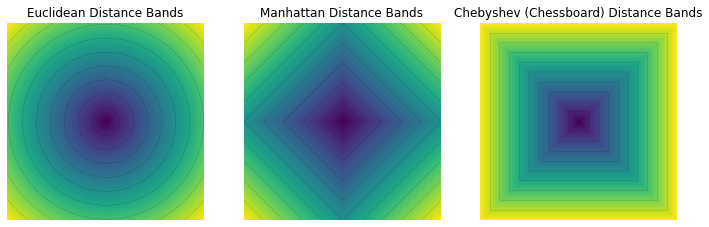

In [5]:
# Create a 2D grid
size = 256
y, x = np.indices((size, size))
grid_points = np.c_[x.ravel(), y.ravel()]

# Define the center point
center = np.array([size//2, size//2])

# Compute distances
euclidean_distances = np.array([euclidean_distance(center, point) for point in grid_points]).reshape(size, size)
manhattan_distances = np.array([manhattan_distance(center, point) for point in grid_points]).reshape(size, size)
chebyshev_distances = np.array([chessboard_distance(center, point) for point in grid_points]).reshape(size, size)

# Normalize distances
euclidean_distances = euclidean_distances / euclidean_distances.max()
manhattan_distances = manhattan_distances / manhattan_distances.max()
chebyshev_distances = chebyshev_distances / chebyshev_distances.max()

# Display the distance bands
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Using 'nipy_spectral' colormap and adding contour lines for better visualization
contour_levels = 10  # Number of contour levels

ax = axes[0]
cax = ax.imshow(euclidean_distances, cmap='viridis')
ax.set_title('Euclidean Distance Bands')
ax.axis('off')
ax.contour(euclidean_distances, levels=contour_levels, colors='k', linewidths=0.1)

ax = axes[1]
cax = ax.imshow(manhattan_distances, cmap='viridis')
ax.set_title('Manhattan Distance Bands')
ax.axis('off')
ax.contour(manhattan_distances, levels=contour_levels, colors='k', linewidths=0.1)

ax = axes[2]
cax = ax.imshow(chebyshev_distances, cmap='viridis')
ax.set_title('Chebyshev (Chessboard) Distance Bands')
ax.axis('off')
ax.contour(chebyshev_distances, levels=contour_levels, colors='k', linewidths=0.1)

plt.show()

 ### 3.3 Convexity Property
The convexity property is often described in relation to shapes or contours in an image. 

A region is considered convex if, for any two points within that region, a straight line connecting those two points entirely lies within the region itself. In other words, if you draw a line segment between any two points inside the region, and that line segment does not leave the region, then the region is convex. If there exist two points within the region such that the line connecting them partially or completely exits the region, then the region is non-convex.

Convex regions have certain mathematical properties and are often easier to work with in image processing and other fields because they do not have complex shapes or concave portions.

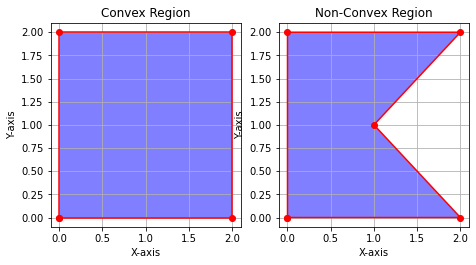

In [6]:
def is_convex(points):
    num_points = len(points)
    
    if num_points < 3:
        return True  # A region with less than 3 points is always convex
    
    # Function to determine the direction (clockwise or counterclockwise)
    def direction(p1, p2, p3):
        val = (p2[1] - p1[1]) * (p3[0] - p2[0]) - (p2[0] - p1[0]) * (p3[1] - p2[1])
        if val == 0:
            return 0
        return 1 if val > 0 else -1
    
    current_direction = direction(points[0], points[1], points[2])
    
    for i in range(num_points):
        next_point = points[(i + 1) % num_points]
        test_direction = direction(points[i], next_point, points[(i + 2) % num_points])
        
        if test_direction != current_direction:
            return False  # The region is not convex
    
    return True

# Example of a convex region
convex_points = [(0, 0), (2, 0), (2, 2), (0, 2)]

# Example of a non-convex region
non_convex_points = [(0, 0), (2, 0), (1, 1), (2, 2), (0, 2)]

# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(7.5, 3.75))

# Plot the convex region
x_convex, y_convex = zip(*convex_points)
axs[0].fill(x_convex, y_convex, 'b', alpha=0.5)
axs[0].plot(tuple(x_convex) + (x_convex[0],), tuple(y_convex) + (y_convex[0],), 'ro-')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].set_title('Convex Region')
axs[0].grid()

# Plot the non-convex region
x_non_convex, y_non_convex = zip(*non_convex_points)
axs[1].fill(x_non_convex, y_non_convex, 'b', alpha=0.5)
axs[1].plot(tuple(x_non_convex) + (x_non_convex[0],), tuple(y_non_convex) + (y_non_convex[0],), 'ro-')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].set_title('Non-Convex Region')
axs[1].grid()

plt.show()

 ### 3.4 Topological Properties
 
Topology or rubber sheet distortions is related to characteristics of objects that remain unchanged under certain deformations, such as stretching, bending, or compressing, as long as there is no joining or tearing of the object. These properties are useful for recognizing and describing objects in images, especially when you want to ignore changes in size, orientation, or shape deformation. A classic example of a topological property is the number of holes in an object, which remains the same under these deformations.

In image processing, you can use topological properties to classify and analyze objects based on their shape characteristics without considering their exact size or geometric details. These properties do not depend on the concept of distance, which means they are invariant to scaling or translation.

Number of holes: 4


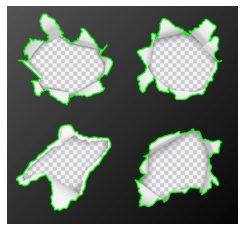

In [7]:
# Load an image containing objects with holes (e.g., a donut)
imgd = cv2.imread('images/donut.jpg')
imgd = cv2.cvtColor(imgd, cv2.COLOR_BGR2RGB)
gimg = cv2.cvtColor(imgd, cv2.COLOR_RGB2GRAY)

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(gimg, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

# Calculate the number of holes in each object
num_holes = 0

for contour in contours:
    # Approximate the contour with a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # If the polygon has more than 4 vertices, it's likely a hole
    if len(approx) > 4:
        num_holes += 1

# Display the number of holes
print("Number of holes:", num_holes)

# Display the image with contours
contour_image = cv2.drawContours(imgd.copy(), contours, -1, (0, 255, 0), 2)
plt.imshow(contour_image)
plt.title('')
plt.axis('off')
plt.show()

 ### 3.5 Interpolation
Interpolation, in the context of image processing, is a technique used to estimate or calculate missing values based on known values within a set of data points. It's like filling in the gaps between known data points. This process is particularly useful in image operations when you need to find the value of a pixel at a location that doesn't align exactly with the known pixel values. For example, if you have pixel values at positions 1, 2, 4, and 5, interpolation allows you to estimate the pixel value at position 3.

Interpolation is commonly used in image processing tasks such as image resizing or zooming, where you need to create a new image with a different size or resolution while preserving the image's visual quality. It helps in determining the values of new pixels that didn't exist in the original image.

There are several interpolation techniques available, and each has its own way of estimating the missing values based on the neighboring known values. The commonly used interpolation methods in image processing are discussed below.

We will create a 5 by 5 matrix as an original image and resize by a factor or 2 (doubling) for the various interpolation methods that will be described. The new image will be a 10 by 10 matrix

In [8]:
# Create a 5x5 matrix as the original image
original_image = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.uint8) 

# Define the resizing factor
resize_factor = 2  # You can change this to resize by a different factor

# Get the dimensions of the original image
height = original_image.shape[0]
width = original_image.shape[1]

# Calculate the new dimensions of the resized image
new_height = height * resize_factor
new_width = width * resize_factor

# Create an empty matrix for the resized image
resized_image = np.zeros((new_height, new_width))

# Create a matrix of zeros with the same shape as the resized image
zeros_matrix = np.zeros((new_height, new_width))

We will use the function below to display the various images after interpolation

In [9]:
def display_images(interpolation_method):
    # Create a matrix of zeros with the same shape as the resized image
    zeros_matrix = np.zeros((new_height, new_width))
    
    # Create a figure and three subplots for displaying the images
    fig = plt.figure(figsize=(15, 5))
    
    # Adjust the width and height ratios to maintain the scale
    grid_spec = plt.GridSpec(1, 3, width_ratios=[width, new_width, new_width], height_ratios=[height]) 

    ax1 = plt.subplot(grid_spec[0])
    ax2 = plt.subplot(grid_spec[1])
    ax3 = plt.subplot(grid_spec[2])

    # Display the original image
    ax1.matshow(original_image, cmap='gray')
    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y-axis')
    ax1.set_title('Original Grayscale Image')
    for i in range(height):
        for j in range(width):
            ax1.text(j, i, str(int(original_image[i, j])), va='center', ha='center', color='r')

    # Display the matrix of zeros
    ax2.matshow(zeros_matrix, cmap='gray')
    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')
    ax2.set_title('Matrix of Zeros')
    for i in range(new_height):
        for j in range(new_width):
            ax2.text(j, i, str(int(zeros_matrix[i, j])), va='center', ha='center', color='r')

    # Display the resized image
    ax3.matshow(resized_image, cmap='gray')
    ax3.set_xlabel('X-axis')
    ax3.set_ylabel('Y-axis')
    ax3.set_title(f'Resized Image ({interpolation_method})')
    for i in range(new_height):
        for j in range(new_width):
            ax3.text(j, i, str(int(resized_image[i, j])), va='center', ha='center', color='r')

    plt.tight_layout()
    plt.show()

# Example usage:
# display_images("Nearest Neighbour")

##### 3.5.1 Nearest Neighbor Interpolation: 
This method assigns the value of the nearest known data point to the unknown point. It's a simple and fast method but can produce blocky or jagged results, especially when resizing images by a significant factor.

In [10]:
# Perform Nearest Neighbor Interpolation
for i in range(new_height):
    for j in range(new_width):
        # Find the corresponding position in the original image
        orig_i = i // resize_factor
        orig_j = j // resize_factor
        # Assign the nearest neighbor value from the original image
        resized_image[i, j] = original_image[orig_i, orig_j]

Plot the images for visualisation

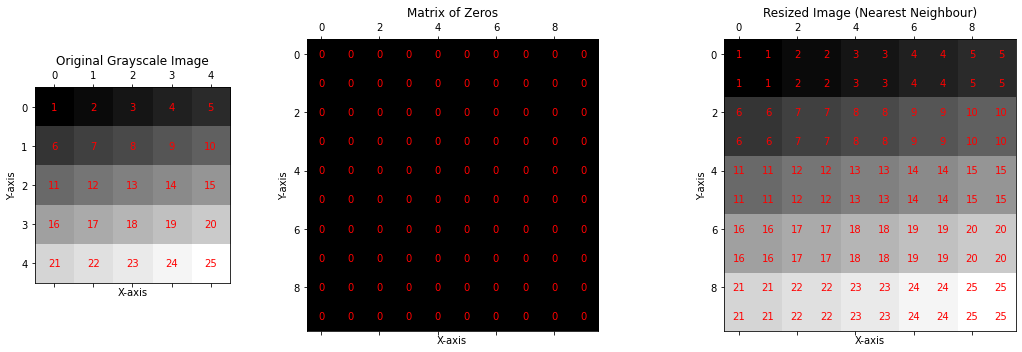

In [11]:
display_images("Nearest Neighbour")

##### 3.5.2 Bilinear Interpolation: 

Bilinear interpolation is a method for estimating pixel values in an image at non-integer coordinates. By using the weighted averages of the closest surrounding pixels, it produces smoother images compared to simpler methods like the nearest neighbor interpolation.

**A Simplified Explanation:**

1. **Desired Pixel Location**: Imagine you want to determine the color or intensity of a point in an image, but that point doesn't exactly match any existing pixel's location.

2. **Four Neighboring Pixels**: Bilinear interpolation doesn't just guess; it considers the four nearest pixel values around the desired point. These are the top-left, top-right, bottom-left, and bottom-right pixels, labeled as $a$, $b$, $c$, and $d$.

3. **Weighted Average Calculation**: The method then calculates a weighted average of these four pixels. The closer a neighboring pixel is to the desired point, the more influence it has on the final value.

The formula for this is:
$$f(x) = a + \Delta i (b - a) + \Delta j (c - a) + \Delta i \Delta j (a - b - c + d)$$
Where $\Delta i$ and $\Delta j$ denote the distances from the desired point to the nearest pixels along the horizontal and vertical axes, respectively.

**Benefits**:
Bilinear interpolation results in smoother transitions between pixels, offering a more visually appealing image. This smoothness is especially evident and valuable when enlarging images, preventing them from appearing blocky or jagged.

In [12]:
# Perform Bilinear Interpolation
for i in range(new_height):
    for j in range(new_width):
        # Find the corresponding position in the original image
        orig_i = i / resize_factor
        orig_j = j / resize_factor
        
        # Calculate the four surrounding pixel coordinates using clipping to avoid out-of-bounds
        i1 = min(max(int(np.floor(orig_i)), 0), height - 1)
        i2 = min(max(int(np.ceil(orig_i)), 0), height - 1)
        j1 = min(max(int(np.floor(orig_j)), 0), width - 1)
        j2 = min(max(int(np.ceil(orig_j)), 0), width - 1)
        
        # Calculate fractional parts
        di = orig_i - i1
        dj = orig_j - j1
        
        # Perform bilinear interpolation
        top = (1 - dj) * original_image[i1, j1] + dj * original_image[i1, j2]
        bottom = (1 - dj) * original_image[i2, j1] + dj * original_image[i2, j2]
        resized_image[i, j] = int((1 - di) * top + di * bottom)

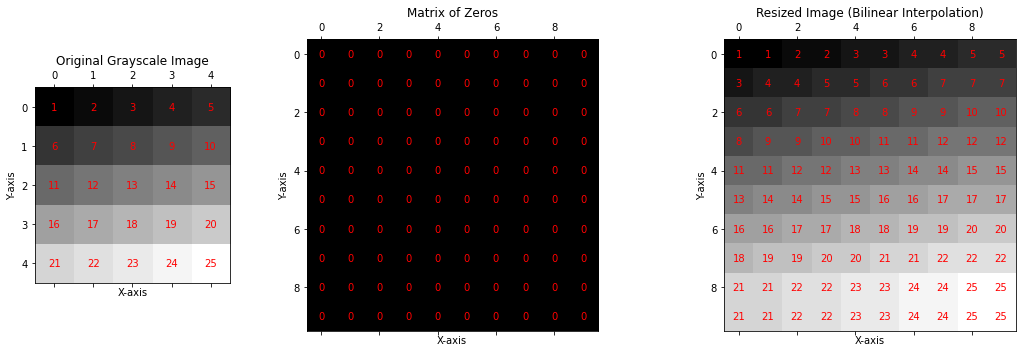

In [13]:
display_images("Bilinear Interpolation")

#####  3.5.3 Bicubic Interpolation:

Bicubic interpolation is a higher-order interpolation technique that takes into account a more expansive neighborhood of pixels for a more accurate estimation. Leveraging a 4x4 grid of known data points around the desired position, it provides an exceptional balance between computational efficiency and output quality, making it the preferred method for many high-quality image processing tasks.

**A Deeper Dive:**

1. **Extended Neighborhood**: Unlike bilinear interpolation, which draws from a 2x2 grid of pixels, bicubic interpolation operates on a 4x4 grid. This grid provides more information and ensures better accuracy in the estimation.

2. **Sophisticated Weighted Average**: The interpolation determines the value at the desired location by computing a weighted average from the 4x4 grid. What sets bicubic apart is its intricate weighting scheme, derived from cubic polynomials, ensuring a more refined output compared to its counterparts.

3. **Quality and Continuity**: The bicubic method excels at preserving image details, resulting in a seamless, visually-pleasing transition between pixels. This level of smoothness is particularly advantageous when trying to minimize visual artifacts.

4. **Best Fit for Precision**: Given its prowess in preserving image details, bicubic interpolation is the method of choice for operations that demand high precision, such as professional image resizing or restoration tasks.

Mathematically, bicubic interpolation can be represented as:
$$ f(x,y) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j $$

Where:
- $f(x,y)$ is the interpolated value at location (x, y).
- $a_{ij}$ are coefficients calculated from the 4x4 grid of pixel values.

In essence, bicubic interpolation can be visualized as crafting a smooth surface over the 4x4 pixel grid and determining the value at the desired point from this surface. This meticulous process ensures that the transitions between pixels are not only smooth but also visually harmonious, making it indispensable for high-quality image transformations.

In [14]:
def bicubic_interpolation(image):
    resized_image = np.zeros((new_height, new_width), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):
            orig_i = i / resize_factor
            orig_j = j / resize_factor

            i1 = int(np.floor(orig_i))
            i0 = max(i1 - 1, 0)
            i2 = min(i1 + 2, height - 1)
            i3 = min(i1 + 3, height - 1)

            j1 = int(np.floor(orig_j))
            j0 = max(j1 - 1, 0)
            j2 = min(j1 + 2, width - 1)
            j3 = min(j1 + 3, width - 1)

            di = orig_i - i1
            dj = orig_j - j1

            # Collect neighboring pixel values within the 4x4 neighborhood
            values = image[i0:i3 + 1, j0:j3 + 1]

            # Bicubic interpolation weights
            weights_i = np.array([cubic_weight(di - m) for m in range(-1, 3)])
            weights_j = np.array([cubic_weight(dj - n) for n in range(-1, 3)])

            # Ensure the weights sum to 1 for normalization
            weights_i /= np.sum(weights_i)
            weights_j /= np.sum(weights_j)

            # Calculate the interpolated value
            interpolated_value = np.sum(weights_i[:, np.newaxis] * values * weights_j)
            resized_image[i, j] = interpolated_value

    return resized_image

def cubic_weight(x, a=-0.5):
    # Cubic interpolation weight function
    if abs(x) <= 1:
        return ((a + 2) * abs(x) - (a + 3)) * abs(x) ** 2 + 1
    else:
        return 0

# Example usage:
# original_image = np.array(...)  # Your input image here
# resize_factor = 2.0  # You can change this to resize by a different factor
# resized_image = bicubic_interpolation(original_image, resize_factor)



In this code, we use cv2.resize with cv2.INTER_CUBIC interpolation to perform bicubic interpolation. 

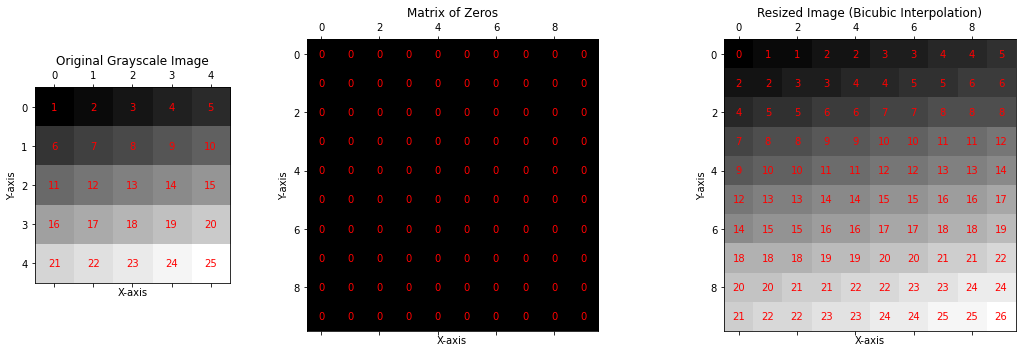

In [15]:
# Perform Bicubic Interpolation using OpenCV
resized_image = cv2.resize(original_image, None, fx=resize_factor, fy=resize_factor, interpolation=cv2.INTER_CUBIC)

display_images("Bicubic Interpolation")

##### 3.5.4 Cubic Spline Interpolation:
Cubic spline interpolation is a technique to find a curve that smoothly passes through a given set of points. This is achieved by constructing a set of cubic polynomials, one for each interval between the points.

a) Each piece of the curve between two points $x_j$ and $x_{j+1}$ is defined by a cubic polynomial.

$$S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3$$

b) The spline matches the function values at the nodes, meaning it goes through every data point.

$$ S_j(x_j) = f(x_j)$$
$$S_j(x_{j+1}) = f(x_{j+1})$$

c) & d) To ensure smoothness, the first and second derivatives of two adjacent polynomials are the same at their common point.

**Relevance to Image Resizing**:

When resizing an image, interpolation techniques are used to determine the values of pixels at non-integer coordinates. For instance, if you're enlarging an image, you need to figure out the pixel values at positions that weren't in the original image. Cubic spline interpolation provides a method to estimate these pixel values.

Consider a simple case: resizing an image in one dimension, like stretching a 1D signal. Each pixel intensity can be viewed as a data point. Now, imagine stretching this signal. For positions that don't align with original pixel positions, you'd use cubic spline interpolation to get a smooth estimate.

In 2D images, this process happens in both x and y directions. Pixels in the resized image get their values by considering their relative positions in the original image and using cubic spline interpolation based on surrounding pixel values.

**Advantages in Image Processing**:

1. **Smoothness**: Cubic spline provides smoother resampling compared to some other methods, like bilinear or nearest-neighbor, making it particularly suitable for continuous-tone images.
  
2. **Accurate Representation**: Since it uses cubic polynomials, it can capture variations in the image more effectively than linear methods.

3. **Edge Preservation**: The smoothness property helps in preserving edges when resizing, preventing the introduction of artifacts or blurriness.

The code below is a visual graph of Cubic Spline Interpolation

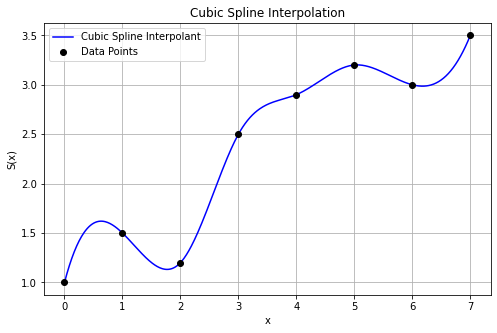

In [16]:
# Given data points
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])  # for x_0, x_1,..., x_7
y = np.array([1, 1.5, 1.2, 2.5, 2.9, 3.2, 3, 3.5])  # sample y-values for illustration

# Generate the cubic spline interpolant
cs = CubicSpline(x, y)

# Generate dense x values for plotting the spline
x_dense = np.linspace(x[0], x[-1], 500)
y_dense = cs(x_dense)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x_dense, y_dense, 'b-', label='Cubic Spline Interpolant')
plt.plot(x, y, 'ko', label='Data Points')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.show()

The `CubicSpline` function from `scipy.interpolate` is designed for 1-dimensional cubic spline interpolation. Images are 2-dimensional, so we need to use an interpolation function that can handle 2D data. The `RectBivariateSpline` class provides bivariate spline approximation over a rectangular mesh, which is suitable for 2-dimensional image data.

The `CubicSpline` function would be more appropriate for 1-dimensional data, such as time series data, signal processing, or any other type of 1D array. When working with images, you need to interpolate in both the x and y dimensions, which requires a 2-dimensional spline interpolation.

However, if you wanted to apply cubic spline interpolation separately along each dimension of the image, you could potentially use `CubicSpline`, but this would be a more complex and less direct approach compared to using `RectBivariateSpline`.

Using `RectBivariateSpline` is more convenient for image interpolation because it directly takes 2-dimensional input and performs the interpolation in both dimensions, returning the interpolated 2-dimensional array. This results in a smoother and more accurate representation of the resized image.

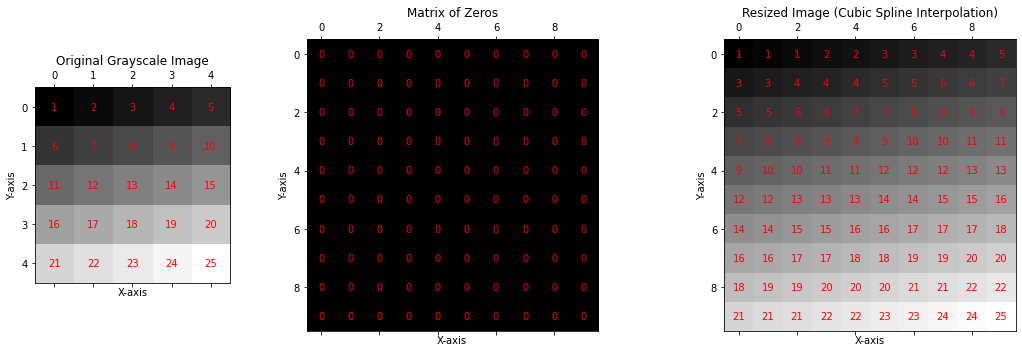

In [17]:
# Initialize cubic spline interpolation function
spline_interpolator = RectBivariateSpline(
    np.arange(height), np.arange(width), original_image, kx=3, ky=3
)

# Compute the new coordinates for the resized image
new_i = np.linspace(0, height - 1, new_height)
new_j = np.linspace(0, width - 1, new_width)

# Perform cubic spline interpolation
resized_image = spline_interpolator(new_i, new_j)

display_images("Cubic Spline Interpolation")

### 3.6 Circularly Symmetric Signals

In the realm of image processing, the term 'signals' often corresponds to the values of individual pixels within an image. When these pixel values are assembled in a two-dimensional (2D) matrix, they form the image we visualize.

**Coordinate Systems**:

- **Cartesian Coordinates**:
  - Represents points in 2D space with horizontal (x) and vertical (y) displacements.
  - Notation: $(x, y)$.

- **Polar Coordinates**:
  - Represents points based on their distance from a central origin and the angle relative to a reference axis (commonly the x-axis).
  - Notation: $(r, \theta)$, where:
    - $r$ is the distance from the origin.
    - $\theta$ denotes the angle with the x-axis.

**Defining Circular Symmetry**:

- A signal exhibits circular symmetry if its value is solely reliant on its distance $r$ from the origin, disregarding the angle $\theta$.
- Mathematically, for such signals, instead of being denoted as $a(x, y)$, they are simplified as $a(r)$; this value remains consistent as we traverse a circle with a radius of $r$ from the origin.

**Conversion Equations**:

To interchange between Cartesian and Polar coordinates, the following equations are utilized:

$$r^2 = x^2 + y^2$$
$$\tan(\theta) = \frac{y}{x}$$

**Relevance in Image Processing**:

- Systems such as optical lenses inherently possess circular symmetry. Hence, when using image processing to emulate or comprehend these systems, the polar coordinate system becomes pivotal.
- Additionally, to dissect signals in these systems, the Fourier representation — a method to decompose signals into constituent sinusoids — can be invaluable.

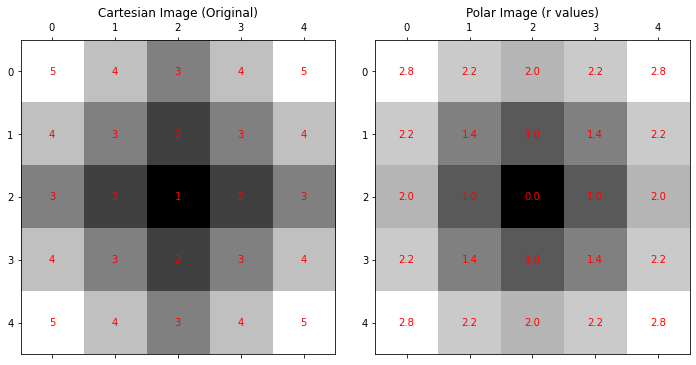

In [18]:
circular_image = np.array([
    [5, 4, 3, 4, 5],
    [4, 3, 2, 3, 4],
    [3, 2, 1, 2, 3],
    [4, 3, 2, 3, 4],
    [5, 4, 3, 4, 5]
], dtype=np.uint8)

# Size of the image
N, M = circular_image.shape

# Origin (center) of the image
center_x, center_y = N // 2, M // 2

# Create an empty matrix for polar coordinates
r_image = np.zeros_like(circular_image, dtype=float)

# Populate the r_image based on distance from the center
for x in range(N):
    for y in range(M):
        r = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
        r_image[x, y] = r

# Displaying the Cartesian and polar images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Cartesian Image
cax1 = ax1.matshow(circular_image, cmap='gray')
ax1.set_title("Cartesian Image (Original)")

# Annotate each cell with its value
for i in range(N):
    for j in range(M):
        ax1.text(j, i, str(circular_image[i, j]), va='center', ha='center', color='r')

# Polar Image (r values)
cax2 = ax2.matshow(r_image, cmap='gray')
ax2.set_title("Polar Image (r values)")

# Annotate each cell with its r value, formatted to 1 decimal place
for i in range(N):
    for j in range(M):
        ax2.text(j, i, f"{r_image[i, j]:.1f}", va='center', ha='center', color='r')

plt.tight_layout()
plt.show()

The given matrix `circular_image` is a 5x5 array. When you visualize it, you'll notice that it has a circular symmetry. The center of this matrix would be the point `(2, 2)` (using 0-based indexing). The values in the matrix increase as you move away from the center.

This code will give you a visual representation of the Cartesian and polar images. The polar image will show increasing brightness as we move away from the center, representing the increasing value of `r`.

### 3.7	Statistics
In image processing, statistics help us summarize and understand the characteristics of images or specific parts of them (sub-images). We often want to know things like "how bright is this image on average?" or "how much does the brightness vary across different parts of the image?". The various statistical methods are explained below.

#### 3.7.1 Probability Distribution and Density:
When we talk about the brightness of an image, we are referring to how light or dark each pixel is. The brightness of each pixel is a value, and we can use statistics to study the distribution of these values.

##### 3.7.1.1 Probability Distribution Function (PDF)
This tells us the probability of a pixel having a certain brightness level. In simpler terms, it helps us understand how likely we are to find a pixel of a certain brightness in our image.

##### 3.7.1.2 Probability Density Function (PDF)
This is closely related to the PDF and helps us understand the distribution of brightness levels across an image. It essentially gives a continuous curve that represents the distribution of brightness values.

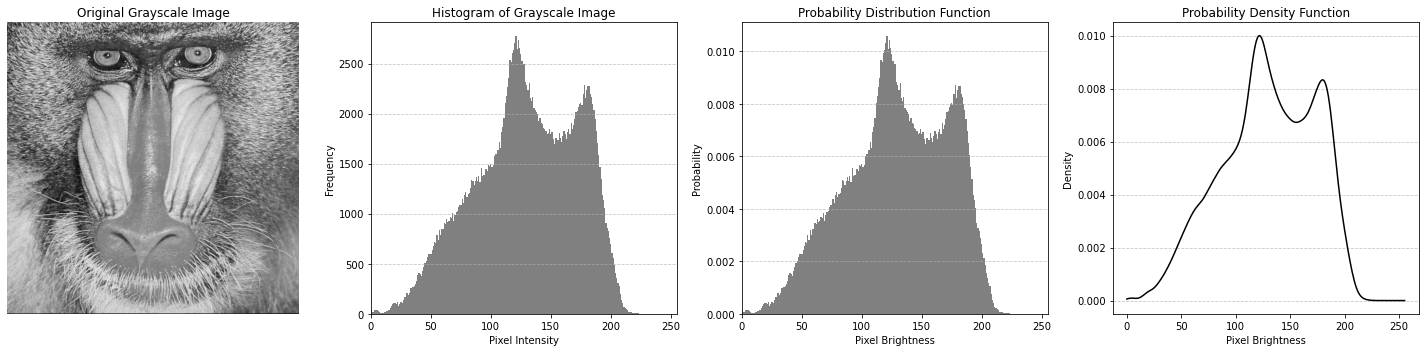

In [19]:
from scipy.stats import gaussian_kde

# Create a figure and four subplots for displaying the images
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(20, 5))

# Display the original grayscale image on the first subplot
ax0.imshow(gray_img, cmap='gray')
ax0.set_title("Original Grayscale Image")
ax0.axis('off')

# Calculate the histogram of the image
hist = np.bincount(gray_img.flatten(), minlength=256)

# Plot the histogram on the second subplot
ax1.bar(range(256), hist, color='gray', width=1.0)
ax1.set_title('Histogram of Grayscale Image')
ax1.set_xlabel('Pixel Intensity')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 255)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate the Probability Distribution Function (PDF)
pdf = hist / np.sum(hist)

# Plot the PDF on the third subplot
ax2.bar(range(256), pdf, color='gray', width=1.0)
ax2.set_title('Probability Distribution Function')
ax2.set_xlabel('Pixel Brightness')
ax2.set_ylabel('Probability')
ax2.set_xlim(0, 255)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Flatten the image to a 1D array
data = gray_img.flatten()

# Calculate the kernel density estimate
kde = gaussian_kde(data)

# Generate an array of brightness values
brightness_values = np.linspace(0, 255, 256)

# Calculate the PDF values for each brightness value
pdf_values = kde(brightness_values)

# Plot the PDF on the fourth subplot
ax3.plot(brightness_values, pdf_values, color='black')
ax3.set_title('Probability Density Function')
ax3.set_xlabel('Pixel Brightness')
ax3.set_ylabel('Density')
ax3.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The histogram, Probability Distribution Function (PDF), and Probability Density Function (PDF) of an image’s pixel intensities share similarities because they all originate from the same data: the brightness values of the pixels. However, each represents this information in a slightly different way, and understanding these distinctions can clarify why they appear similar.

##### 1. Histogram:
The histogram of an image shows the frequency (or count) of each pixel intensity value in the image.
- **Appearance**: It is a bar chart where the x-axis represents the possible pixel intensity values (usually from 0 to 255 for an 8-bit grayscale image), and the y-axis represents the count of pixels in the image that have each intensity value.

###### 2. Probability Distribution Function (PDF):
The PDF shows the probability of each pixel intensity value occurring in the image. It is derived from the histogram.
- **How it’s calculated**: By dividing each value in the histogram by the total number of pixels in the image.
- **Appearance**: The PDF will have a shape very similar to the histogram, but the y-axis values will be scaled down so that they sum to 1, representing probabilities.

###### 3. Probability Density Function (PDF):
The PDF in the context of image processing (and when estimated using methods like kernel density estimation) can be thought of as a smoothed version of the histogram. It represents the probability of a pixel having a certain intensity, accounting for variability and aiming to fit a continuous probability distribution to the discrete data.
- **Appearance**: The PDF will often appear smoother than the histogram, and its shape will follow the general trend of the histogram. Like the PDF, its y-values will be scaled to represent probabilities.

###### Similarities:
All three representations (histogram, PDF, and KDE-based PDF) share the same x-axis, representing the brightness levels.
They all give a visual representation of the distribution of brightness levels in the image.
Peaks in the histogram will also appear as peaks in both PDFs, indicating that those brightness levels are more frequent in the image.

###### Differences:
The y-axis scale is different. The histogram shows the frequency of each brightness level, while the PDFs show probabilities.
The PDFs sum up to 1, ensuring that they represent a valid probability distribution. The histogram does not have this constraint.
The KDE-based PDF provides a smoothed version of the distribution, which can be beneficial for understanding the underlying probability distribution, especially when dealing with noisy data or when the distribution is not perfectly clear from the histogram.

#### 3.7.2	Average
The average brightness of a region in an image can be understood as the typical brightness level across all the pixels in that region. It’s calculated by adding up the brightness of each pixel and then dividing by the total number of pixels. 

In simpler terms, if you imagine each pixel's brightness as a score, the average brightness would be the score that represents the whole group most fairly. 
$$ m_{a} = \frac{1}{N} \sum_{i=1}^{N} x_i $$
In this formula:
Let:
- $N$ represent the total number of pixels in the region.
- $x_{i}$ represents the brightness of each pixel, and
- $\sum$ denotes the summation of the brightness levels of all pixels.

Suppose you have a small region in an image, and the brightness levels of the pixels in this region are as follows:

`brightness = [100, 120, 130, 110, 115]`

To find the average brightness, m you would calculate it as:

$m_{a} = \frac{100 + 120 + 130 + 110 + 115}{5} = \frac{575}{5} = 115$

So, the average brightness of this region is 115.

Average Brightness of the region: 142.3688


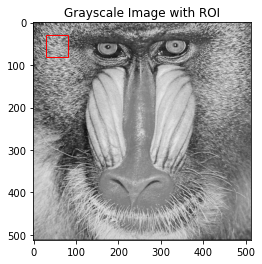

In [20]:
# Define a region of interest (ROI)
# For example, a square region from (x, y) = (30, 30) to (80, 80)
x, y, w, h = 30, 30, 50, 50
roi = gray_img[y:y+h, x:x+w]

# Calculate the average brightness of the region
average_brightness = np.mean(roi)
print(f"Average Brightness of the region: {average_brightness}")

# Visualize the image and the region of interest
plt.imshow(gray_img, cmap='gray')
plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none'))
plt.title('Grayscale Image with ROI')
plt.show()

#### 3.7.3 Standard Deviation in Image Processing
Standard deviation is a statistical measure that tells us how spread out the numbers in a dataset are. In the context of image processing, standard deviation measures how spread out the brightness values are in an image or a region of an image. 

If the standard deviation is low, it means that the pixel brightness values are very close to the average brightness, resulting in a smoother region. If the standard deviation is high, it indicates that there is a wide range of brightness values, resulting in a region with more contrast and potentially more detail or noise.

In simpler terms, when we talk about images, they're made up of pixels, and each pixel has a brightness value. Imagine you have a bunch of these brightness values, and you want to know how spread out they are. That's where the standard deviation comes into play!

**Standard Deviation in Simple Words:**
Think of standard deviation as a tool that tells us how "wild" or "tame" our image is:
- **Low Standard Deviation**: The image is calm, with pixel brightness values huddled close together, giving a smooth appearance.
- **High Standard Deviation**: The image is wild, with pixel brightness values scattered all over, resulting in stark contrasts and more details.

**Math Behind the Scenes:**

1. **Sample Standard Deviation:** 
    It's like an average of how much each pixel's brightness deviates from the overall average brightness of the image.
    $$S_{a} = \sqrt{\frac{1}{N-1} \sum (a[m, n] - m_{a})^2}$$
    Where:
     - $a[m, n]$ is the brightness of an individual pixel.
     - $m_a$ is the overall average brightness.
     - $N$ is the total pixel count.

2. **Alternative Approach:** 
    Instead of looking at each pixel's deviation, we square their brightness and compare with the squared average brightness.
    $$S_{a} = \sqrt{\frac{\sum a^2[m, n] - N m_a^2}{N-1}}$$

3. **Using Histograms**: 
    If you've charted out how frequently each brightness value appears in the form of a histogram, you can use it to figure out the standard deviation.
    $$S_a = \sqrt{\frac{\sum a^2 h[a] - N m_a^2}{N-1}}$$

At the end of the day, standard deviation helps gauge the contrast in an image. A high value indicates diverse brightness levels (more contrast), and a low one suggests uniformity.

#### 3.7.4 Coefficient of Variation in Image Processing

The Coefficient of Variation (CV) is a useful statistic in image processing, especially when you want to compare the spread of pixel intensities in different images or regions of an image. It provides a standardized measure of dispersion, which is particularly beneficial when the means of the datasets being compared are significantly different.

The Coefficient of Variation is defined as the ratio of the standard deviation to the mean, often multiplied by 100% to transform it into a percentage. In the context of image processing, it allows for a normalized measure of the variation in pixel intensities.

Mathematically, the Coefficient of Variation $\text{CV}$ is given by:

$$\text{CV} = \left( \frac{s_a}{m_a} \right) \times 100\%$$

Where:
- $s_a$ is the standard deviation of pixel intensities.
- $m_a$ is the mean pixel intensity of the image or the region of interest.

In essence, the CV quantifies the relative variability of pixel values in relation to the mean pixel intensity. A higher CV indicates a higher degree of pixel intensity variability, while a lower CV indicates more uniform pixel values. This can be valuable in image analysis, especially when distinguishing regions of an image with varying textures or intensities.

Code below showcases both Satndard Deviation and 3.7.5	Coefficient-of-variation

Average Brightness (ma) = 129.61527633666992
Standard Deviation (Sa) = 42.312806007005925
Coefficient of Variation (CV) = 32.64%


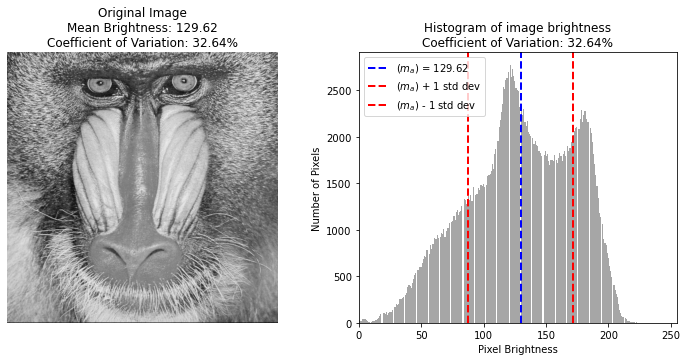

In [21]:
# Calculate the average brightness (ma) and standard deviation (Sa) of the image using numpy
ma = np.mean(gray_img)
Sa = np.std(gray_img)

# Calculate the Coefficient of Variation (CV)
CV = (Sa / ma) * 100

print(f"Average Brightness (ma) = {ma}")
print(f"Standard Deviation (Sa) = {Sa}")
print(f"Coefficient of Variation (CV) = {CV:.2f}%")

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title(f"Original Image\nMean Brightness: {ma:.2f}\nCoefficient of Variation: {CV:.2f}%")
plt.axis('off')

# Display the histogram with mean, standard deviation, and CV
plt.subplot(1, 2, 2)
plt.hist(gray_img.ravel(), bins=256, color='gray', alpha=0.7)
plt.axvline(ma, color='blue', linestyle='dashed', linewidth=2, label=f"($m_a$) = {ma:.2f}")
plt.axvline(ma + Sa, color='red', linestyle='dashed', linewidth=2, label=f"($m_a$) + 1 std dev")
plt.axvline(ma - Sa, color='red', linestyle='dashed', linewidth=2, label=f"($m_a$) - 1 std dev")
plt.legend()
plt.title(f"Histogram of image brightness\nCoefficient of Variation: {CV:.2f}%")
plt.xlabel("Pixel Brightness")
plt.ylabel("Number of Pixels")
plt.xlim([0, 255])
plt.tight_layout()
plt.show()

#### 3.7.5 Percentiles in Image Processing

In image processing, percentiles help to understand the distribution of pixel brightness levels. The percentile gives insight into the relative standing of a pixel value compared to the rest of the pixel values in an image.

- **Percentile Definition**: 
  When we say a pixel intensity value is at the p-th percentile, it means that `p%` of the pixel values in the image are below that intensity.

- **Mathematically**:  
  If $P(a)$ is the p-th percentile of the pixel brightness in an image, then the integral (or sum for digital images) of the pixel intensities from the lowest value to $a$ is equal to $p%$:
  
  $$\int_{-\infty}^{a} p(\alpha) \, d\alpha = p\%$$

  Where $p(\alpha)$ is the probability distribution function of the pixel intensities.

- **Special Cases**:
  1. **0% (Minimum Value)**: This represents the darkest pixel value in the image. No pixel has a lower brightness.
  2. **50% (Median Value)**: Half of the pixel values in the image are below this value, and half are above. It gives a middle-ground representation of brightness in the image.
  3. **100% (Maximum Value)**: This represents the brightest pixel value in the image. All other pixel values are either equal to or darker than this value.

**Relevance in Image Processing**:
Percentiles are powerful because they provide a way to understand the distribution of brightness in an image without being affected by extreme outliers. For instance, while an average might get skewed by a few very bright or very dark pixels, the median (50th percentile) would remain unchanged. It's useful for tasks like histogram equalization, thresholding, and contrast enhancement.


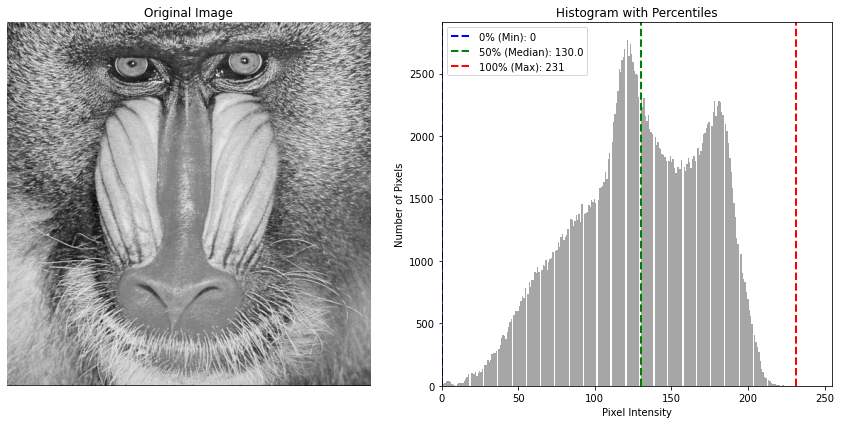

In [22]:
img = gray_img.astype(np.int32)  # Convert to int32

# Calculate percentiles using numpy
#    min_val = np.percentile(gray_img, 0)
#    median_val = np.percentile(gray_img, 50)
#    max_val = np.percentile(gray_img, 100)

# Calculate the percentiles manually
sorted_pixels = np.sort(img.ravel())
total_pixels = sorted_pixels.size

# 0% percentile (minimum value)
min_val = sorted_pixels[0]

# 50% percentile (median value)
if total_pixels % 2 == 0:
    median_val = (sorted_pixels[total_pixels // 2 - 1] + sorted_pixels[total_pixels // 2]) / 2
else:
    median_val = sorted_pixels[total_pixels // 2]

# 100% percentile (maximum value)
max_val = sorted_pixels[-1]

# Display the original image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the histogram with percentiles
plt.subplot(1, 2, 2)
plt.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
plt.axvline(min_val, color='blue', linestyle='dashed', linewidth=2, label=f"0% (Min): {min_val}")
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f"50% (Median): {median_val}")
plt.axvline(max_val, color='red', linestyle='dashed', linewidth=2, label=f"100% (Max): {max_val}")
plt.legend()
plt.title("Histogram with Percentiles")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.xlim([0, 255])
plt.tight_layout()

plt.show()

#### 3.7.6 Mode
In image processing, just like in statistics, the mode represents the value that appears most frequently in a set. For an image, this would mean the brightness value (pixel intensity) that occurs the most number of times across the entire image.

- **Grayscale Images**: In a grayscale image, pixel intensities range from 0 (complete black) to 255 (complete white). The mode would be the specific intensity value that appears the most in the image. 

- **Color Images**: In a color image, you'd typically have three channels (Red, Green, and Blue). Each channel can have its own mode, meaning the Red channel might have a different mode than the Green or Blue channels.


1. **Existence**: There might be images where no value is repeated, meaning there's no mode. Conversely, there could be multiple values with the same highest frequency, resulting in multiple modes.

2. **Importance**: The mode can be useful in several image processing tasks:
   - **Thresholding**: If an image has a clear mode, it could be used to set a threshold for binary segmentation.
   - **Background Detection**: In many applications, the mode might represent the background color, especially if the background occupies a large part of the image.

3. **Limitations**: Since the mode only considers the most frequent value, it might not always represent the 'average' or 'typical' brightness of an image. For such purposes, other measures like mean or median are often more suitable.

4. **Formulas**: Given a set of data values or a distribution, the mode is the value $a$ that maximizes the frequency function $f$, such that:

$$a = \text{arg max} \ f(a)$$

Where:
- $a$is an element from the set of data values or the distribution.
- $f(a)$ is the frequency of value $a$ in the set.

In the context of an image, if you have a histogram $h$ representing the pixel intensities of the image, the mode is the intensity $I$ that has the highest frequency:

$$I_{\text{mode}} = \text{arg max} \ h(I)$$

Where:
- $I$ is a pixel intensity value ranging from 0 to 255 for a grayscale image.
- $h(I)$ is the histogram count for intensity $I$.

It's important to note that the mode might not exist, or there might be multiple modes if several intensity values share the highest frequency.

The mode of the image is: 121


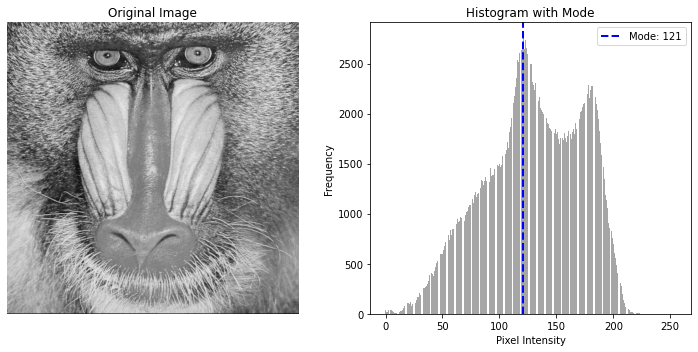

In [23]:
# Calculate the mode using scipy
    #mode_value, count = stats.mode(gray_img.ravel())

# Compute histogram
hist, bins = np.histogram(gray_img, bins=256, range=(0, 256))

# Determine the mode by finding the intensity with the highest count
mode_value = np.argmax(hist)

print(f"The mode of the image is: {mode_value}")

# Visualize
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram
plt.subplot(1, 2, 2)
plt.bar(range(256), hist, color='gray', alpha=0.7)
plt.axvline(mode_value, color='blue', linestyle='dashed', linewidth=2, label=f"Mode: {mode_value}")
plt.legend()
plt.title("Histogram with Mode")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### 3.7.7 Mode Signal-to-Noise Ratio in Image Processing

The Signal-to-Noise Ratio (SNR) is a measure used in many fields that quantifies the quality of a signal (in this case, an image). Signal-to-Noise Ratio is a pivotal metric in image processing that gauges the clarity of an image. It provides a comparison between the power (or variance) of the true signal in the image and the noise that may obscure it.

**Key Concepts**:

- **Signal**: The genuine and meaningful content in the image. It's the "true" image we aim to capture and represents the actual object or scene.
  
- **Noise**: The undesired and random variations within the image, often manifesting as random specks, graininess, or color variations. Such disturbances can arise from various sources, such as limitations in camera sensors, environmental interferences, or data transmission disruptions.

**Mathematically**, SNR is formulated as:

$$\text{SNR} = 20 \log_{10} \left( \frac{S_s}{S_n} \right)$$

Here:
- $S_s$ denotes the standard deviation of the signal, reflecting its strength or variance.
  
- $S_n$ signifies the standard deviation of the noise, showcasing its intensity or variability.

When expressed in decibels (dB), this logarithmic scale offers a more intuitive interpretation. A high SNR value indicates a predominant signal compared to noise, implying a clearer image. Conversely, a low SNR suggests that the image is considerably affected by noise.


In essence, understanding SNR is crucial as it informs us about the quality of the image. A high SNR ensures that the vital information in the image is not overshadowed by noise, leading to clearer and more accurate image representations.

Let's illustrate the concept of Signal-to-Noise Ratio (SNR) using a simple example:

- We'll start with a clean image, considering it as our "signal".
- We'll introduce some random "noise" into the image.
- Calculate the SNR.
- Finally, we'll visualize the original image, the noisy image, and the calculated SNR.

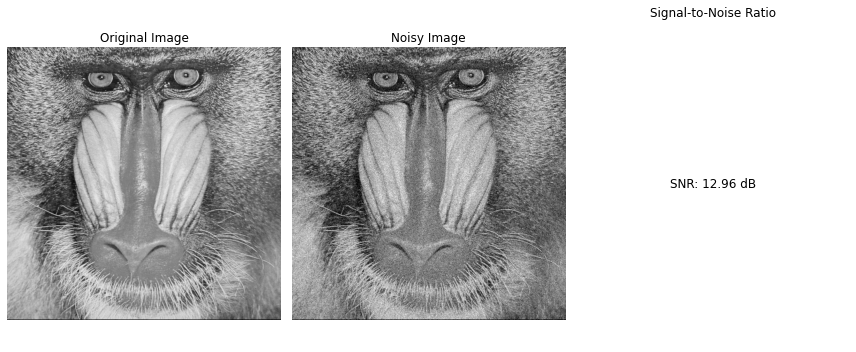

In [24]:
# Introduce random noise
noise = np.random.normal(0, 20, gray_img.shape)
noisy_image = gray_img + noise

# Clip values to remain within 0-255
noisy_image = np.clip(noisy_image, 0, 255)

# Calculate SNR
signal_power = np.var(gray_img)
noise_power = np.var(noise)
SNR = 20 * np.log10(signal_power / noise_power)

# Display the images and the SNR
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, f'SNR: {SNR:.2f} dB', ha='center', va='center', fontsize=12)
plt.title("Signal-to-Noise Ratio")
plt.axis('off')

plt.tight_layout()
plt.show()

### 3.8 Transforms in Image Processing

In the realm of image processing, the term "transform" refers to the mathematical operations that allow us to represent an image in a different domain, often to extract specific features or characteristics. Two primary domains used in image processing are the spatial domain and the frequency domain.

**Spatial Domain:**
This is the domain most people are familiar with when thinking about images. In the spatial domain, an image is represented by pixel values at specific spatial coordinates (x, y). The value at each pixel corresponds to the intensity or color value at that location.

**Frequency Domain:**
On the other hand, the frequency domain provides a representation of the image in terms of frequencies. It captures the rate of intensity variation in the image. In simple terms, high frequencies in an image correspond to rapid changes in intensity, such as edges, while low frequencies correspond to slow changes or smooth areas.

Transforming an image from the spatial to the frequency domain can highlight certain features that might be less discernible in the spatial domain. Furthermore, operations applied in the frequency domain can have specific effects when transformed back to the spatial domain.

In frequency domain, an image can be expressed as a linear combination of some basis functions of some linear integral transform, e.g., Fourier transform, cosine transform, wavelet transform.

#### 3.8.1 Two-dimensional signals (images)
At its core, an image is like a two-dimensional signal, where you have both width and height. Just as you can break down sound signals into simpler parts, you can also break down images into simpler patterns using something called a two-dimensional transform.

**Main Points:**

1. **Transforming an Image:** Consider an image that's square-shaped, with a size of N x N, and is represented by $f(x, y)$. We can change its representation into another form, $g(u, v)$, using a special process called transformation.

2. **The Transformation Process:** To transform an image, we use certain mathematical formulas or "kernels". The transformation from $f(x, y)$ to $g(u, v)$ is done using a formula called the forward transform:

$$g(u, v) = \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} T(u, v, x, y) f(x, y)$$

If you ever want to reverse this transformation and get back the original image from $g(u, v)$, you use the inverse transform:

$$f(x, y) = \sum_{u=0}^{N-1} \sum_{v=0}^{N-1} I(x, y, u, v) g(u, v)$$

In these formulas:
   - $T$ is the forward transformation kernel.
   - $I$ is the reverse or inverse transformation kernel.

###### Special Features of Kernels:

1. **Can be Split (Separability):** If the forward transformation, $T$, can be broken down into two simpler formulas, $T1(u, x)$ and $T2(v, y)$, then it's termed as "separable". It’s like saying we can treat the width and height separately during the transformation:

$$ T(u, v, x, y) = T1(u, x) T2(v, y)$$

2. **Both Parts are the Same (Symmetry):** If the formulas for width and height are identical, the kernel is symmetric. Basically, $T1$ does the same job for both width and height:

$$T(u, v, x, y) = T1(u, x) T1(v, y)$$

If a kernel is both split-able and has identical parts, we can use a simpler and quicker matrix method to represent the transformation:

$$ g = T1 . f . T1^T$$

Here, $f$ is the original image in matrix form, and $T1$ is the transformation matrix.

###### Preserving Image Quality (Unitary Transform):

If our transformation not only changes the image's representation but also ensures that the image's quality remains unchanged, it's termed as "separable unitary". It's like converting a book into an e-book without losing any content.

If our transformation matrix, $T1$, has a unique property called "unitary", then we call the entire transformation process "separable unitary". This ensures that when we reverse the transformation, we get our original image back without any loss:

$$f = T1^* . g . T1^*$$

Here, $T1^*$ means we're using a special version of the $T1$ matrix, its complex conjugate transpose.

In simple terms, these fancy transformations let us work with images in ways that can make our tasks, like editing or compressing an image, easier and more effective.

###### Why Transforms are Crucial in Image Processing

Transforms play a vital role in image processing, offering a different perspective to analyze and manipulate images for various applications. Here's an in-depth look at why they are indispensable:

1. **Frequency Analysis and Data Compression:** Transforms enable the representation of an image in the frequency domain, shedding light on prevalent and rare patterns. This insight is invaluable since the human eye has varying sensitivity to different frequencies. By concentrating on significant patterns while potentially sidelining or compressing less important ones, we achieve efficient data compression, ensuring that vital information is retained while reducing file size.

2. **Filtering, Enhancement, and Noise Reduction:** Images often come with imperfections such as noise or undesired patterns, predominantly found in the high-frequency domain. Transforms facilitate the identification and attenuation of these high frequencies, allowing for effective noise reduction and image enhancement. This process not only improves image quality but also contributes to a clearer representation, aiding further image processing tasks.

3. **Efficient Operations and Compact Representation:** Certain image processing operations, including convolution, are computationally more efficient in the transformed frequency domain than in the original spatial domain. Additionally, transforms offer a compact representation of images, highlighting crucial features like edges which may be less noticeable in the spatial domain. This compactness is particularly beneficial for tasks requiring pattern recognition or feature extraction, as it simplifies the data, making it more manageable and easier to work with.

4. **Data Reduction and Resource Optimization:** By emphasizing important aspects of an image and de-emphasizing the less crucial parts, transforms contribute to significant data reduction. This is instrumental in image compression, where the goal is to minimize storage space usage without compromising on critical image information. Transforms like the Discrete Cosine Transform (DCT) are adept at representing images with a minimal number of coefficients, contributing to more efficient data storage and transmission.

#### 3.8.2 Discrete Fourier Transform

#### Continuous Space and Continuous Frequency

The idea behind the Fourier Transform is to take an image (or any signal) and find out what different frequencies are present in it. In simpler terms, it's like taking a musical note and finding out all the different pitches and volumes that make it up.

For a two-dimensional function like an image $f(x, y)$, we can convert it to its frequency representation $F(u, v)$ using the Fourier Transform:

$$F(u, v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \cdot e^{-j2\pi (ux + vy)} \, dx \, dy$$

And you can convert it back to the spatial domain (the original image) using the Inverse Fourier Transform:

$$f(x, y) = \frac{1}{(2\pi)^2} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u, v) \cdot e^{j2\pi (ux + vy)} \, du \, dv$$

Here, $j$ is the imaginary unit (similar to $i$ in mathematics), and $u, v$ represent frequencies in the x and y directions.

The result, $ F(u, v) $, is a complex number. You can think of it as having two parts: a real part and an imaginary part. So, we write it as:

$$ F(u, v) = R(u, v) + jI(u, v) $$

Where:
- $ R(u, v) $ is the real part.
- $ I(u, v) $ is the imaginary part.

From this complex result, we can derive three important things:

1. **Amplitude Spectrum**: It tells us how strong different frequencies are in the image.
$$ |F(u, v)| = \sqrt{R^2(u, v) + I^2(u, v)}$$

2. **Phase Spectrum**: It tells us the position information of these frequencies.
$$ \phi(u, v) = \tan^{-1}\left(\frac{I(u, v)}{R(u, v)}\right) $$

3. **Power Spectrum**: It's the square of the Amplitude Spectrum, giving us the power at each frequency.
$$ P(u, v) = |F(u, v)|^2 $$

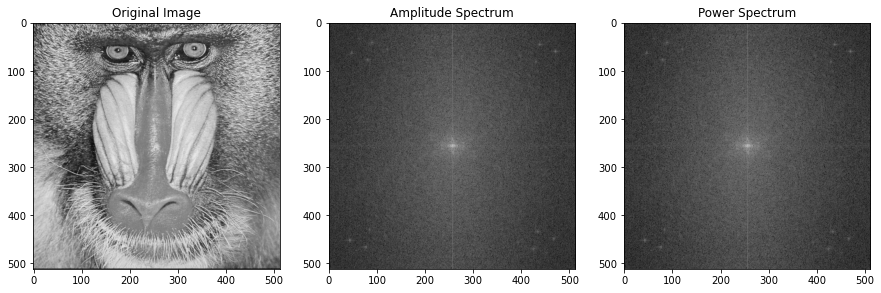

In [25]:
from scipy.fft import fft2, fftshift

# Normalize the image to be in the range [0, 1]
norm_img = gray_img.astype(np.float32) / 255.0

# Apply the Fourier Transform
f_transform = fft2(norm_img)
f_transform_shifted = fftshift(f_transform)

# Calculate the Amplitude Spectrum
amplitude_spectrum = np.abs(f_transform_shifted)

# Calculate the Power Spectrum
power_spectrum = np.square(amplitude_spectrum)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(norm_img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(np.log(amplitude_spectrum + 1), cmap='gray'), plt.title('Amplitude Spectrum')
plt.subplot(1, 3, 3), plt.imshow(np.log(power_spectrum + 1), cmap='gray'), plt.title('Power Spectrum')
plt.show()

In this code:
- We load an image and convert it to a grayscale image.
- We apply the Fourier Transform using $fft2$, which gives us a complex matrix representing the frequencies in the image.
- We calculate the Amplitude and Power Spectrums to visualize the strengths of different frequencies.
- We display the original image along with its Amplitude and Power Spectrums.

The $fftshift$ function is used to bring the zero-frequency component to the center of the image. Without it, the zero-frequency component would be at the top-left corner, which might be less intuitive to look at. The `log` function is used to enhance the visibility of the spectrums since the spectrum can vary across a large range of values.

2. **Amplitude Spectrum**:
    - This is derived from the Fourier Transform of the original image. The Fourier Transform decomposes the image into its constituent sine and cosine waves of varying frequencies. 
    - The center of the amplitude spectrum image represents the low frequencies, while the outer regions represent the high frequencies.
    - In most natural images, low-frequency components (which relate to broader structures and gradual changes in the image) dominate. This is why the center of the amplitude spectrum is bright.
    - The brightness in the amplitude spectrum indicates the magnitude or strength of a particular frequency. In the image, the brightest part is at the center, meaning the dominant frequencies are the low ones. These correspond to the large structures in the image like the overall shape of the face, head, and major features.
    - The dark regions outside the center show that high-frequency components (which represent sharp edges, fine details, and noise) have lower magnitudes in comparison. However, these details are essential for sharp transitions and details like fur and facial textures.
    - The amplitude spectrum is typically visualized using a logarithmic scale (with a small offset to avoid taking the logarithm of zero) to better see the wide range of amplitude values.

3. **Power Spectrum**:
    - This is essentially the square of the amplitude spectrum.
    - It represents the power or energy associated with each frequency component.
    - Similar to the amplitude spectrum, the power spectrum of most natural images will have most of its energy concentrated at the low frequencies. This is evident from the bright center in the power spectrum.
    - The power spectrum also helps in identifying dominant features in an image. Higher power at a specific frequency implies that the corresponding sine or cosine wave plays a significant role in constructing the original image.

**What to Look Out For**:
- **Dominant Features**: By examining the amplitude and power spectra, you can get an idea of which frequencies (and thus which features) are dominant in an image. A bright center means a lot of low-frequency components, indicating smoother variations in the image.
  
- **High-Frequency Details**: If there are bright spots or patterns away from the center of the amplitude spectrum, they indicate the presence of strong high-frequency components, which might correspond to edges, textures, or noise.

- **Noise and Artifacts**: Noise or unwanted details often manifest as high-frequency content. If you observe unexpected bright spots in the outer regions of the amplitude or power spectrum, they might be indicative of noise or other artifacts.

- **Symmetry**: The spectra should be symmetric about the center. This is due to the real-valued nature of the images. Any asymmetry might indicate some form of directional artifact.

Understanding these spectra can be beneficial in various applications, such as image filtering, compression, and enhancement. For instance, if you're trying to remove noise, you might focus on attenuating certain high-frequency components observed in the amplitude spectrum.

#### Discrete Space and Continuous Frequency

In the world of image processing, sometimes we deal with discrete images but are interested in their frequency characteristics, which can be continuous. This is where the concept of Discrete Space and Continuous Frequency comes into play. 

The 2-D discrete space Fourier transform pair for a sequence $ f(x, y)$ is defined as follows:

$$F(u, v) = \sum_{x=-\infty}^{\infty} \sum_{y=-\infty}^{\infty} f(x, y) e^{-j(xu + vy)}$$
$$f(x, y) = \frac{1}{(2\pi)^2} \int_{-\pi}^{\pi} \int_{-\pi}^{\pi} F(u, v) e^{j(xu + vy)} \, du \, dv $$

Here, $F(u, v)$ represents the continuous frequency content of the discrete space image, and it repeats every $2\pi$ in both $u$ and $v$ directions.

######  Simplified Explanation
Imagine an image as a collection of dots (pixels) on a grid. Each dot has a value representing its brightness. Our goal is to understand the patterns of brightness across the image, but instead of looking at the dots directly, we want to describe the patterns using waves.
1. **$f(x, y) $**: This is our image - a collection of bright and dark dots.
2. **$F(u, v) $**: This represents the 'wave recipe' to create our image. It tells us what kinds of waves, with what frequencies, are needed to add up to our image.
3. **Complex-valued**: Each ingredient in our 'wave recipe' comes with two pieces of information: how strong it is (magnitude) and in what direction it’s wiggling (phase). These are stored as complex numbers.

###### Example in Python
Here’s a small example in Python, demonstrating how to transform an image into the frequency domain and visualize it:

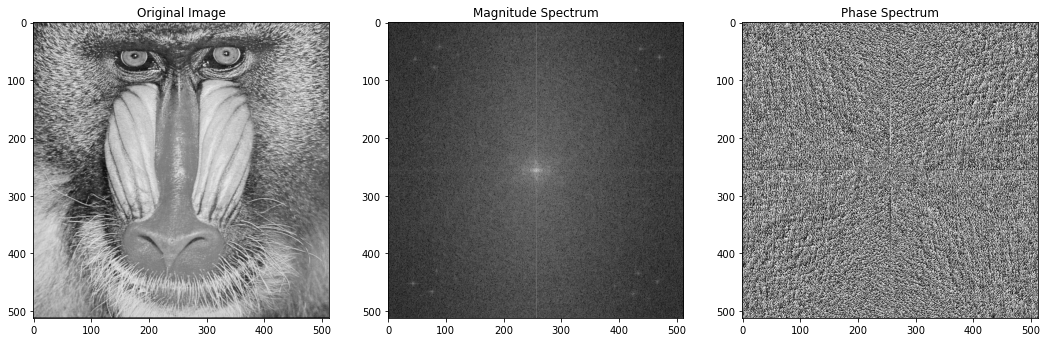

In [26]:
# Normalize the image to be in the range [0, 1]
norm_img = gray_img.astype(np.float32) / 255.0

# Assume gray_img is our loaded image
f_transform = np.fft.fft2(norm_img)
f_transform_shifted = np.fft.fftshift(f_transform)

magnitude_spectrum = np.abs(f_transform_shifted)
phase_spectrum = np.angle(f_transform_shifted)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1), plt.imshow(norm_img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(1, 3, 3), plt.imshow(phase_spectrum, cmap='gray'), plt.title('Phase Spectrum')
plt.show()

###### Discrete Space and Discrete Frequency: The 2-D DFT

When dealing with digital images, which are discrete in nature, we use the Two-Dimensional Discrete Fourier Transform (2-D DFT) for analysis.

Given a digital image $f(x, y)$ of size $ M \times N $, the 2-D DFT and its inverse are defined as:

$$ F(u, v) = \frac{1}{MN} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) e^{-j2\pi\left(\frac{ux}{M} + \frac{vy}{N}\right)} $$
$$ f(x, y) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) e^{j2\pi\left(\frac{ux}{M} + \frac{vy}{N}\right)} $$

For square images ($M = N $), these simplify to:

$$F(u, v) = \frac{1}{N^2} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} f(x, y) e^{-j2\pi\left(\frac{ux + vy}{N}\right)} $$
$$ f(x, y) = \sum_{u=0}^{N-1} \sum_{v=0}^{N-1} F(u, v) e^{j2\pi\left(\frac{ux + vy}{N}\right)} $$

#### Example in Python
Below is a simplified example to demonstrate the 2-D DFT in Python:

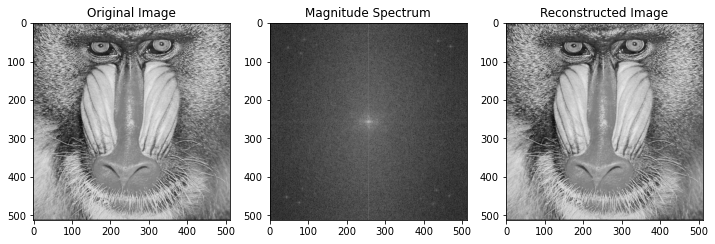

In [27]:
from scipy.fft import fft2, ifft2, fftshift
norm_img = gray_img.astype(np.float32) / 255.0

if norm_img.ndim == 3:
    norm_img = gray_img[:, :, 0]

# Applying the 2-D DFT
F = fft2(norm_img)
F_shifted = fftshift(F)
magnitude_spectrum = np.log(np.abs(F_shifted) + 1)

# Reconstructing the image
f_reconstructed = np.abs(ifft2(F))

# Displaying the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(norm_img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(133), plt.imshow(f_reconstructed, cmap='gray'), plt.title('Reconstructed Image')
plt.show()

###### Properties of 2-D DFT
- **Separable**: The 2-D DFT can be computed row-wise and column-wise, which simplifies calculations.
- **Symmetric**: The DFT of a real-valued image is symmetric in the frequency domain.
- **Unitary**: The transformation preserves the overall 'energy' of the image from spatial domain to frequency

#### 3.8.3 Wavelet Transform
Wavelet Transform is a powerful tool in image processing and analysis, enabling us to break down an image into its constituent parts at different scales. This is different from Fourier Transform, which decomposes an image into sinusoids. Wavelet Transform provides both frequency and spatial information, making it more effective for analyzing signals that have non-stationary or time-varying characteristics.

###### Discrete Wavelet Transform (DWT)
The Discrete Wavelet Transform decomposes an image $g$ into a set of wavelet coefficients $G$, which can be expressed as:

$$ G = W(g) $$

Here, $ W $ represents the wavelet transform operator.

The decomposition results in low-pass (approximation) coefficients and high-pass (detail) coefficients at each scale, which can be computed using the following formulas:

****Approximation Coefficients:****
$$ W\phi(j_0, r, s) = \frac{1}{\sqrt{M}} \sum_{x=0}^{r-1} \sum_{y=0}^{s-1} g(x, y) \phi_{j_0, r, s} (x, y) $$

****Detail Coefficients:****
$$ W\psi_i(j, r, s) = \frac{1}{\sqrt{M}} \sum_{x=0}^{r-1} \sum_{y=0}^{s-1} g(x, y) \psi_{i, j, r, s} (x, y) $$

Here, $ W\phi $ and $ W\psi_i $ represent the approximation and detail (wavelet) coefficients respectively, $ \phi $ and $ \psi_i $ are the basis functions, $ i $ identifies the type of detail (horizontal, vertical, and diagonal), $ j $ represents the scale, $ j_0 $ is an arbitrary starting scale, and $ r, s $ are position-related parameters.

****Frequency Sub-Bands****

The decomposition produces different frequency sub-bands labelled as $LL_j, LH_j, HL_j$, and $HH_j$, where $j$ indicates the resolution level:

- $LL_j$: Rough approximation of the image signal.
- $LH_j$, $HL_j$, $HH_j$: Horizontal, vertical, and diagonal details of the image signal, respectively.

The $HH_1$ sub-band is the noisiest among all sub-bands at each resolution level. We can further decompose the $LL_{j-1}$ sub-band to obtain the $LH_j, HL_j$, and $HH_j$ sub-bands.

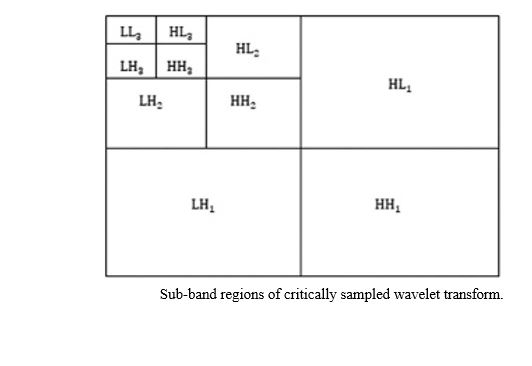

****Python Visualization****
Here’s how you can apply the Discrete Wavelet Transform to an image and visualize the resulting sub-bands:

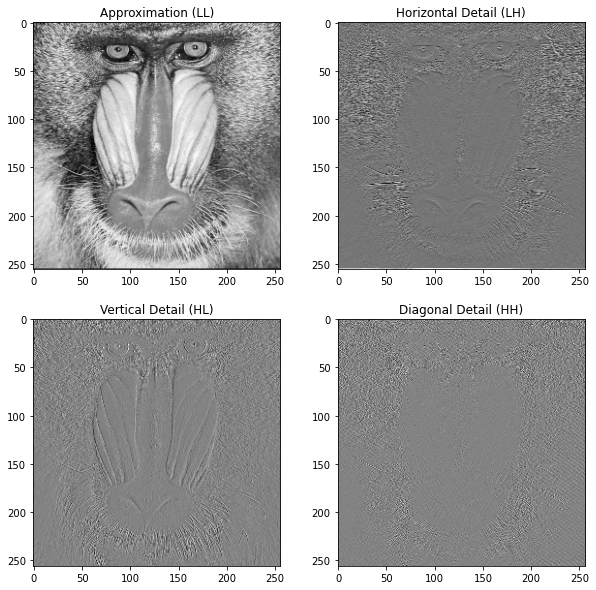

In [28]:
# Normalize the image to be in the range [0, 1]
norm_img = gray_img.astype(np.float32) / 255.0

# Apply 2D Discrete Wavelet Transform
coeffs = pywt.dwt2(norm_img, 'haar')
cA, (cH, cV, cD) = coeffs

# Visualize the results
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1), plt.imshow(cA, cmap='gray'), plt.title('Approximation (LL)')
plt.subplot(2, 2, 2), plt.imshow(cH, cmap='gray'), plt.title('Horizontal Detail (LH)')
plt.subplot(2, 2, 3), plt.imshow(cV, cmap='gray'), plt.title('Vertical Detail (HL)')
plt.subplot(2, 2, 4), plt.imshow(cD, cmap='gray'), plt.title('Diagonal Detail (HH)')

plt.show()

In this example, $cA$ represents the approximation coefficients, while $cH$, $cV$, and $cD$ represent the horizontal, vertical, and diagonal details, respectively. The $haar$ argument specifies the use of the Haar wavelet, but other wavelets can be used depending on the application.

****Differentiation from Fourier Transform****

While Fourier Transform represents a signal as a sum of sinusoids, Wavelet Transform represents a signal in terms of wavelets, which are localized in both time and frequency. Wavelet Transform is thus more suitable for analyzing signals with discontinuities and sharp spikes, and it provides a multi-resolution analysis that captures both the global and local characteristics of the signal.

#### 3.8.4 Discrete Cosine Transform (DCT)
The Discrete Cosine Transform (DCT) is a technique to transform a signal from its spatial representation into a frequency representation, similar to the Fourier Transform. However, unlike the Fourier Transform which uses both sine and cosine functions, the DCT only uses cosine functions. The primary applications of DCT are in data compression, particularly in the JPEG image compression standard.

For 2-D signals (like an image f(x,y) of size NxN), the DCT is defined as:

$$C(u, v) = a(u)a(v) \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} f(x, y) \cos \left( \frac{(2x + 1)u\pi}{2N} \right) \cos \left( \frac{(2y + 1)v\pi}{2N} \right)$$

Where:

- $C(u, v)$ is the DCT coefficient at frequency $(u,v)$.
- $f(x, y)$ is the pixel value at spatial coordinate $(x,y)$.
- $N$ is the size of the image or signal block (often 8 for JPEG compression).
- $a(u)$ and $a(v)$ are scaling factors:
  $$
  a(u) = \begin{cases} 
      \frac{1}{\sqrt{N}} & \text{for } u = 0 \\
      \sqrt{\frac{2}{N}} & \text{for } u = 1,2,...,N-1 
   \end{cases}
  $$

The inverse DCT (IDCT) to transform back from the frequency domain to the spatial domain is given by:

$$ f(x, y) = \sum_{u=0}^{N-1} \sum_{v=0}^{N-1} a(u)a(v) C(u, v) \cos \left( \frac{(2x + 1)u\pi}{2N} \right) \cos \left( \frac{(2y + 1)v\pi}{2N} \right)$$

Where:
$ a(u) = \begin{cases} 
\sqrt{1/N} & \text{if } u = 0 \\
\sqrt{2/N} & \text{otherwise}
\end{cases} $
And $ u, v = 0,1,…, N – 1.$

****Advantages of DCT over Fourier Transform and DWT:****
1. **Real Values**: DCT is a real transform, meaning the transformed values are real numbers. This contrasts with the Fourier Transform, which can yield complex values.
2. **Energy Compaction**: DCT has a property called energy compaction, where most of the signal information tends to be concentrated in a few low-frequency components of the DCT. This makes it particularly useful for compression since higher frequency components (which generally contain less information) can be discarded.
3. **Widely Used in Compression**: The DCT's properties make it essential in image and video compression schemes, especially in the JPEG image compression standard.



****Differences from Fourier Transform and DWT:****
1. **Nature**: While the Fourier Transform provides a complex-valued output, the DCT provides only real-valued outputs.
2. **Basis Functions**: Fourier uses both sine and cosine functions, DCT only uses cosine functions, and DWT uses wavelets (which are localized in both time and frequency).
3. **Applications**: DCT is predominantly used in image compression (like JPEG) due to its energy compaction properties, while DWT has applications in various fields including denoising, compression, etc. Fourier Transform has broad applications, including frequency analysis of signals.

**Python Visualization:**
Let's visualize the DCT on an image and its inverse.

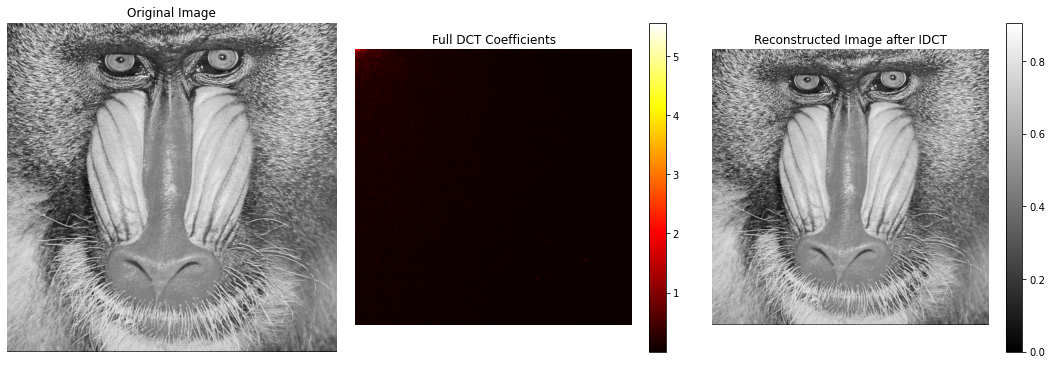

In [29]:
# Normalize the image to [0,1]
img = gray_img.astype(np.float32) / 255.0

# Compute the 2D DCT of the image
dct_img = cv2.dct(img)

# Prepare to display 3 images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Full DCT Coefficients
im1 = axes[1].imshow(np.log1p(np.abs(dct_img)), cmap='hot')
axes[1].set_title('Full DCT Coefficients')
axes[1].axis('off')
plt.colorbar(im1, ax=axes[1])

# Reconstructed Image after IDCT
reconstructed_img = cv2.idct(dct_img)
im2 = axes[2].imshow(reconstructed_img, cmap='gray')
axes[2].set_title('Reconstructed Image after IDCT')
axes[2].axis('off')
plt.colorbar(im2, ax=axes[2])

# Show all plots
plt.tight_layout()
plt.show()


The code displays all the DCT coefficients, but keep in mind that the top-left corner represents the lower frequencies and carries most of the visual details. As you move to the bottom-right, the frequencies get higher, and these coefficients are usually smaller and often become insignificant for image compression.

#### 3.8.5 Walsh Transform (WT)
The Walsh Transform is an orthogonal, non-sinusoidal transformation technique. In simpler terms, it’s a method that converts a signal (like an image) into a different representation, much like the Fourier Transform or the DCT. The primary difference is in the basis functions that the Walsh Transform uses.

**Basis Functions**

While the Fourier transform uses sine and cosine waves and the DCT uses only cosine functions, the Walsh transform uses square waves with values of -1 and 1. Square waves, being non-sinusoidal, make the Walsh transform particularly well-suited for digital implementations because of its binary nature. This makes calculations quicker and more efficient in digital systems.

The 2D Walsh transform can be given by:
$ W(u, v) = \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} (-1)^{b_1(x)+b_1(y)} f(x, y) $

Where:
- $ W(u, v) $ is the transformed image
- $ f(x, y) $ is the original image
- $ b_1(x) $ and $ b_1(y) $ represent the binary representation of x and y

The inverse of the Walsh transform (to retrieve the original image from its Walsh-transformed version) is given by:
$f(x, y) = \frac{1}{N^2} \sum_{u=0}^{N-1} \sum_{v=0}^{N-1} (-1)^{b_1(x)+b_1(y)} W(u, v) $

****Differences from Fourier, DCT, and DWT****:

1. **Basis Functions**:
   - **Fourier**: Uses sinusoidal waves (sine and cosine).
   - **DCT**: Uses only the cosine function.
   - **DWT**: Uses wavelets, which can be viewed as small waveforms of varying length.
   - **Walsh**: Uses square waves with values of either -1 or 1.
   
2. **Implementation**:
   - The Walsh Transform can be implemented more efficiently in a digital environment than the exponential basis functions of the Fourier transform or the cosine functions of the DCT.
   
3. **Orthogonality**:
   - All these transforms use orthogonal basis functions, but the Walsh Transform's basis functions are particularly simple due to their binary nature.

4. **Compression**:
   - While DCT is commonly used in JPEG compression due to its energy compaction properties, the Walsh transform is not typically used for image compression. Its efficiency in digital environments makes it more suitable for other applications like pattern recognition.

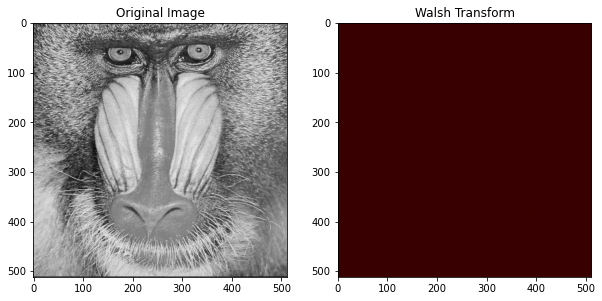

In [30]:
def walsh_matrix(n):
    """Generate a Walsh matrix of order n x n."""
    if n == 1:
        return np.array([[1]])
    smaller_matrix = walsh_matrix(n // 2)
    # Construct the matrix based on smaller matrix
    top_left = smaller_matrix
    top_right = smaller_matrix
    bottom_left = smaller_matrix
    bottom_right = -smaller_matrix
    top = np.hstack((top_left, top_right))
    bottom = np.hstack((bottom_left, bottom_right))
    return np.vstack((top, bottom))

def walsh_transform(image):
    """Compute the Walsh transform of an image."""
    n, m = image.shape
    if n != m:
        raise ValueError("The image should be square for Walsh Transform")
    W = walsh_matrix(n)
    return np.dot(W, np.dot(image, W))

# Assume you have a square grayscale image named gray_img
img = gray_img.astype(np.float32) / 255.0

# Compute Walsh Transform
walsh_img = walsh_transform(img)

# Displaying Images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(walsh_img, cmap='hot')
axes[1].set_title('Walsh Transform')
plt.show()

**Note**: The Walsh transform is less common in typical image processing tasks compared to DCT, DWT, or FFT. However, its properties can be advantageous in specific applications that require rapid computation and where sinusoidal basis functions aren't optimal.

### 3.9 Matrix Operations

In image processing, matrices are especially significant because images are often represented as matrices where each element corresponds to a pixel value. Let's break down the mentioned matrix operations:

1. **Matrix Addition**:
   This operation involves adding the corresponding elements of two matrices.
   
   $$ (A + B)_{ij} = a_{ij} + b_{ij} $$

2. **Matrix Subtraction**:
   Here, the corresponding elements of one matrix are subtracted from the other.
   
   $$ (A - B)_{ij} = a_{ij} - b_{ij} $$
   
3. **Matrix Multiplication**:
   The result of multiplying two matrices is obtained by multiplying elements of the rows of the first matrix with the elements of the columns of the second matrix and summing them up. This is why the number of columns in the first matrix should equal the number of rows in the second matrix.
   
   $$ (A \times B)_{ik} = \sum_{l=1}^{n} a_{il} \times b_{lk} $$

   Note that matrix multiplication is **not commutative**; $A*B$ may not be the same as $B*A$.
   $$ $$

4. **Identity Matrix (I)**:
   This is a square matrix where all the diagonal elements are 1, and all other elements are 0. Multiplying any matrix by the identity matrix results in the original matrix.
   
   $$ A \times I = I \times A = A $$

5. **Inverse Matrix**:
   A matrix $ A^{-1} $ is the inverse of matrix A if their product results in the identity matrix. Not all matrices have inverses. A matrix must be square (same number of rows and columns) and its determinant should not be zero for it to have an inverse.
   
   $$ A \times A^{-1} = A^{-1} \times A = I $$


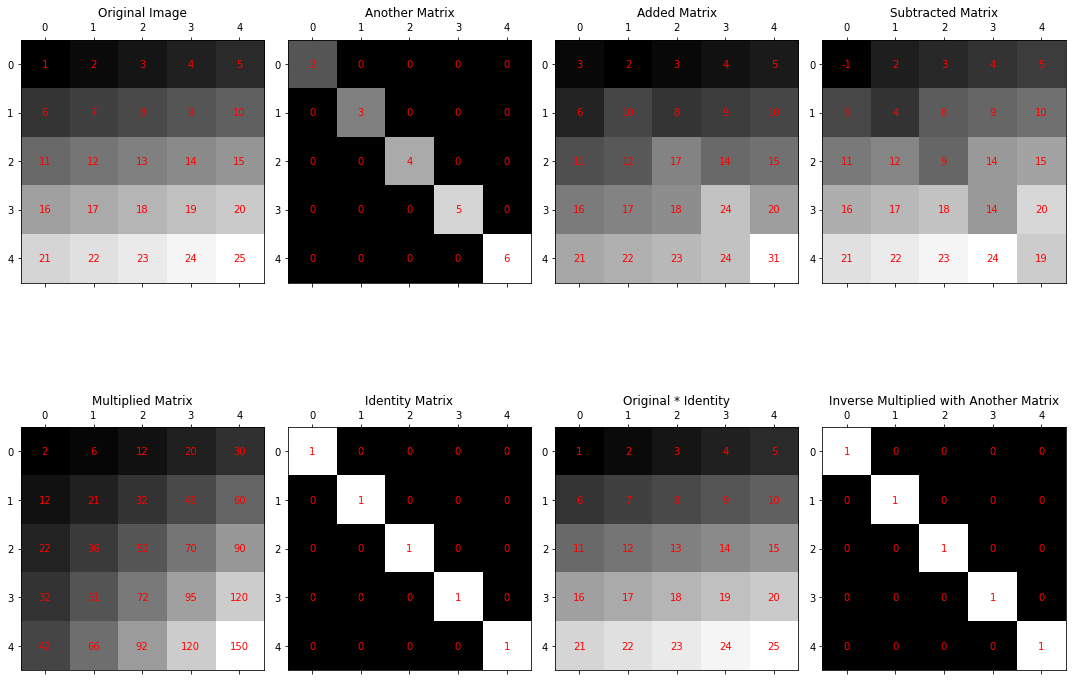

In [31]:
# Given matrix
original_image = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float64)

# A diagonal matrix
another_matrix = np.diag([2, 3, 4, 5, 6])

# Matrix Addition
added_matrix = original_image + another_matrix

# Matrix Subtraction
subtracted_matrix = original_image - another_matrix

# Matrix Multiplication
multiplied_matrix = np.dot(original_image, another_matrix)

# Identity Matrix
identity_matrix = np.identity(5)

# Matrix multiplied with identity
identity_multiplied = np.dot(original_image, identity_matrix)

# Inverse Matrix
inverse_matrix = np.linalg.inv(another_matrix)
inverse_multiplied = np.dot(another_matrix, inverse_matrix)

# Visualization with matrix values overlay
plt.figure(figsize=(15, 12))

matrices = [original_image, another_matrix, added_matrix, subtracted_matrix,
            multiplied_matrix, identity_matrix, identity_multiplied, inverse_multiplied]
titles = ['Original Image', 'Another Matrix', 'Added Matrix', 'Subtracted Matrix', 
          'Multiplied Matrix', 'Identity Matrix', 'Original * Identity', 'Inverse Multiplied with Another Matrix']

for idx, (matrix, title) in enumerate(zip(matrices, titles), start=1):
    ax = plt.subplot(2, 4, idx)
    ax.matshow(matrix, cmap='gray')
    ax.set_title(title)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, str(int(matrix[i, j])), va='center', ha='center', color='r')

plt.tight_layout()
plt.show()

### 3.10 Set Theory
Set theory is a foundational branch of mathematics which deals with collections of objects, and has found extensive applications in various fields, including image processing. In the context of image processing, particularly in mathematical morphology, images are viewed as sets of pixels or regions, and set operations are applied on them to achieve desired results.

**Definitions and Operations**:
1. **Set**: A set is a collection of distinct objects, considered as an object in its own right. These objects are referred to as the elements or members of the set. 
   - For instance, let $ A = \{1, 2, 3\} $. Here, 1, 2, and 3 are the elements of set $ A $.
   $$$$
   
2. **Sub-set**: If every element of set $ A $ is also an element of set $ B $, then $ A $ is a sub-set of $ B $, denoted by $ A \subseteq B $.
  $$$$
  
3. **Proper Sub-set**: If $ A $ is a sub-set of $ B $ but $ A \neq B $, then $ A $ is a proper sub-set of $ B $, denoted by $ A \subset B $.
 $$$$
  
4. **Equality of Sets**: Two sets $ A $ and $ B $ are equal if they contain exactly the same elements.
 $$$$

5. **Universal Set**: It is the set containing all the elements under consideration, typically denoted by $ U $. Every other set in the context is a sub-set of this universal set.
 $$$$
 
6. **Union**: The union of two sets $ A $ and $ B $ is the set of elements which are in $ A $, or in $ B $, or in both. It is denoted as $ A \cup B $.
   - $$ A \cup B = \{ x | x \in A \text{ or } x \in B \} $$
 $$$$
 
7. **Intersection**: The intersection of two sets $ A $  and $ B $ is the set of elements which are both in $ A $ and in $ B $. It's denoted as $ A \cap B $.
   - $$ A \cap B = \{ x | x \in A \text{ and } x \in B \} $$
 $$$$
 
8. **Disjoint Sets**: Two sets are disjoint if they have no elements in common, which means their intersection is an empty set.
 $$$$
 
9. **Complement**: Given a universal set $ U $ and a set $ A $ within $ U $, the complement of $ A $ comprises all elements in $ U $ that are not in $ A $. It is denoted by $ A' $ or $ A^c $.
   - $$ A^c = \{ x | x \in U \text{ and } x \notin A \} $$
 $$$$
 
**Python Implementation**:
For demonstration, we can use Python's built-in set type.
This code will showcase basic set operations using two sample sets $ A $ and $ B $ and a universal set $ U $.


In [32]:
# Define two sample sets
A = {1, 2, 3, 4}
B = {3, 4, 5, 6}

# Universal set
U = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

print(f"Set A: {A}")
print(f"Set B: {B}")

# Union
print(f"A U B: {A.union(B)}")

# Intersection
print(f"A ∩ B: {A.intersection(B)}")

# Check if disjoint
print(f"Are A and B disjoint? {A.isdisjoint(B)}")

# Complement of A
print(f"Complement of A: {U - A}")

Set A: {1, 2, 3, 4}
Set B: {3, 4, 5, 6}
A U B: {1, 2, 3, 4, 5, 6}
A ∩ B: {3, 4}
Are A and B disjoint? False
Complement of A: {0, 5, 6, 7, 8, 9}


One of the most intuitive ways to visualize set operations using image matrices is to treat images as binary masks, where pixels with value $1$ represent presence (or the set's members) and pixels with value $0$ represent absence.

For instance, consider two binary images (or matrices) $ A $ and $ B $ of the same size. Pixels with value $1$ in $ A $ represent elements in set $ A $, and similarly for $ B $. We can then visually represent common set operations as follows:

1. **Union** ($ A \cup B $): This is an image where a pixel has value $1$ if the corresponding pixel is $1$ in either $A $ or $ B $ (or both).
$$$$
2. **Intersection** ($A \cap B $): This image has value $1$ only where both $ A $ and $ B $ have value $1$.
$$$$
3. **Complement** ($ A^c $): Assuming a universal matrix $ U $ where all pixels are $1$, the complement of $A $ will have value $1$ wherever $ A $ has value $0$.
$$$$
4. **Difference**: The set of elements in $ A $ but not in $ B $ can be visualized as pixels that are $1$ in $ A $ but $0$ in $ B $.
$$$$
Let's represent these operations with a Python code example using NumPy:

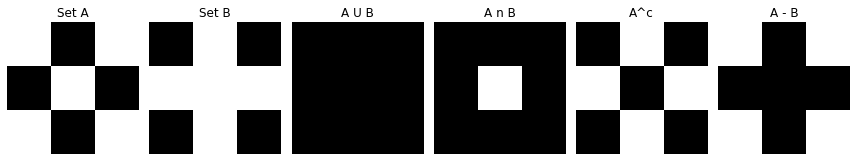

In [33]:
# Create two sample image matrices
A = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

B = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# Universal set (all elements are 1)
U = np.ones_like(A)

# Set operations
union_AB = np.clip(A + B, 0, 1)         # Union: A U B
intersection_AB = A * B                 # Intersection: A n B
complement_A = np.where(A == 1, 0, 1)   # Complement of A with respect to U: Ac
difference_AB = A * np.where(B == 1, 0, 1)  # Difference: A - B 

# Visualize the sets and operations
fig, ax = plt.subplots(1, 6, figsize=(12, 3))

ax[0].imshow(A, cmap='gray')
ax[0].set_title('Set A')

ax[1].imshow(B, cmap='gray')
ax[1].set_title('Set B')

ax[2].imshow(union_AB, cmap='gray')
ax[2].set_title('A U B')

ax[3].imshow(intersection_AB, cmap='gray')
ax[3].set_title('A n B')

ax[4].imshow(complement_A, cmap='gray')
ax[4].set_title('A^c')

ax[5].imshow(difference_AB, cmap='gray')
ax[5].set_title('A - B')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

1. Union ($A \cup B $)
2. Intersection ($ A \cap B $)
3. Complement ($ A^c $) with respect to a universal set $ U $
4. Difference ($ A - B $)

This code defines and visualizes the two sample sets $ A $ and $ B $ and then calculates and displays the set operations. The operations are visualized using grayscale images, where pixels with a value of $1$ (white) represent elements in the respective set, and pixels with a value of $0$ (black) represent the absence of elements.